# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#1.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 75:25 Train Test Split </h3></a>
            <ul><a href='#1.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#1.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>A. 75:25 Train Test Split with PCA </h3></a>
            <ul><a href='#1.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#2.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. 75:25 Train Test Split </h3></a>
            <ul><a href='#2.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#2.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.D' style="text-decoration : none; color : #000000;"><h3>A. 75:25 Train Test Split with PCA </h3></a>
            <ul><a href='#2.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
</ol>

In [1]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time
import multiprocessing

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D


import scipy as sp
from scipy import stats
from mca import *
from scipy.stats import boxcox
import hdbscan


%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML

import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.graph_objs import *
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
# tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
# tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')


import keras

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

Using TensorFlow backend.


In [2]:
traffic_column_names =['Recorded_Time','Received_Time','Serial_Number','Type','Subtype','Config_Version','Generated_Time',
               'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
               'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface',
               'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port',
               'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action','Bytes','Bytes_sent','Bytes_received',
               'Packets','Start_Time','Elapsed_Time','Category','Future_Use_1','Sequence_Number','Action_flags','Source_Location',
               'Destination_Location', 'Future_Use_2', 'Packets Sent', 'Packets Received', 'Session End Reason','Drop_1','Drop_2',
               'Drop_3','Drop_4','Drop_5','device_name','From_Policy','Drop_6','Drop_7','Drop_8','Drop_9','Drop_10','Drop_11',
               'Drop_12']

threat_column_names=['Recorded_Time','Received_Time','Serial_Number','Type','Subtype', 'Config_Version','Generated_Time',
                     'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
                     'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface', 
                     'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port', 
                     'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action', 'Miscellaneous','Threat_ID', 
                     'Category', 'Severity', 'Direction','Sequence_Number', 'Action_Flags','Source_Location','Destination_Location',
                     'Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Something','Drop_46','Drop_47','Drop_48','Drop_49',
                     'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                     'device_name','Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_66','Drop_67','Drop_68',
                     'Detailed_Subtype','Something_2','From_Policy']

In [3]:
#### Function to read logs 
def read_logs(rel_path,compression=None,extension=None,column_names=None):
    path = rel_path
    zip_files = [f for f in os.listdir(path) if f.endswith(extension)]
    paths = [path + x for x in zip_files]
    df=pd.DataFrame()
    for i in range(0,len(paths)):
        try:
            demo_df=pd.read_csv(paths[i],header=None,infer_datetime_format=True,low_memory=True,
                                compression=compression,error_bad_lines=False,warn_bad_lines=False,memory_map=True)
        except:
#             print(i,paths[i],"\n")
            continue
        if demo_df.empty!=True:
            df=df.append(demo_df)
        else:
            print("Not empty")
    df.columns=column_names
    return df

In [4]:
#### Path extensions from where to read logs
root_paths=['../../data/2017-09-26/','../../data/2017-09-27/','../../data/2017-09-28/','../../data/2017-09-29/',
            '../../data/2017-09-30/','../../data/2017-10-01/','../../data/2017-10-02/','../../data/2017-10-03/',
            '../../data/2017-10-04/','../../data/2017-10-05/','../../data/2017-10-06/','../../data/2017-10-07/',
            '../../data/2017-10-08/','../../data/2017-10-09/','../../data/2017-10-10/','../../data/2017-10-11/'
           ,'../../data/2017-10-12/','../../data/2017-10-13/','../../data/2017-10-14/','../../data/2017-10-15/'
           ,'../../data/2017-10-16/','../../data/2017-10-17/','../../data/2017-10-18/','../../data/2017-10-19/'
           ,'../../data/2017-10-20/','../../data/2017-10-21/','../../data/2017-10-22/','../../data/2017-10-23/'
            ,'../../data/2017-10-24/','../../data/2017-10-25/','../../data/2017-10-26/']

In [151]:
#### To read traffic logs uncomment the below part. 
# traffic_logs=pd.DataFrame()
# for i in range(0,len(root_paths)):
#     print(root_paths[i])
#     df2=(read_logs(root_paths[i],'gzip','.gz',traffic_column_names))
#     traffic_logs=pd.concat([traffic_logs,df2])
    
# traffic_logs.drop(['From_Policy','Drop_1','Drop_2','Drop_3','Drop_4','Drop_5',
#                    'Future_Use_2','Action_flags','Future_Use_1','NAT_Source_Port','NAT_Destination_Port',
#                    'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
#                    'Log_Forwarding_Profile','Serial_Number','Config_Version','Source_Zone','Destination_Zone',
#                    'Ingress_Interface','Egress_Interface'],axis=1,inplace=True)


#### If you have saved the logs somehwere read it using the uncommented block below
traffic_logs=pd.read_csv('../Traffic.csv')
traffic_logs.Received_Time=pd.to_datetime(traffic_logs.Received_Time,errors='coerce')
traffic_logs.sort_values(by='Received_Time',inplace=True)
# traffic_logs.dropna(inplace=True,subset=['Source_User'])
traffic_logs.reset_index(inplace=True,drop=True)
traffic_logs.drop(['Unnamed: 0'],inplace=True,axis=1)

In [152]:
#### Read threat logs

threat_logs=pd.DataFrame()
for i in range(0,len(root_paths)):
    df2=(read_logs(root_paths[i],None,'Wireless-PA.csv',threat_column_names))
    threat_logs=pd.concat([threat_logs,df2])
    
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time)
threat_logs.sort_values(by='Received_Time',inplace=True)
threat_logs.dropna(inplace=True,subset=['Source_User'])
threat_logs.reset_index(inplace=True,drop=True)

In [153]:
#### remove users who are present in the threat logs but do not appear in the traffic logs
# b=threat_logs.Source_User.unique()
# count=0
# c=traffic_logs.Source_User.unique()
# d=[]
# for i in range(0,len(b)):
#     if b[i] not in c:
#         count=count+1
# #         print(b[i]) 
#         d.append(b[i])
#     else:
#         continue
# for i in range(0,len(d)):
#     threat_logs=threat_logs[threat_logs.Source_User!=d[i]]

In [154]:
#### Bascially to export logs for the users not present in the traffic logs
# q=threat_logs[threat_logs.Source_User=='b82653e4eea7bf3b0678c1e4143e64046f6132d82164d4c0c14d5fa993fda8af']

# q=q.append(threat_logs[threat_logs.Source_User=='bc6'])

# q=q.append(threat_logs[threat_logs.Source_User=='d0e4a472a56ed031ed5063b27df8d14e7c55fa68c35995364be2091f1230945a'])

# q=q.append(threat_logs[threat_logs.Source_User=='e'])

# q=q.append(threat_logs[threat_logs.Source_User=='bb55d0daf6d89297b9a3af725850bb5c387364a97983b7486270e590177a885b'])

# q=q.append(threat_logs[threat_logs.Source_User=='e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab'])

# len(q)

# len(threat_logs[threat_logs.Source_User=='e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab'])

# q.to_csv('Users_Not_Found.csv')

In [155]:
# print("Length of traffic logs:",len(traffic_logs))
# print("Number of unique users:",traffic_logs.Source_User.nunique())

# print("Length of threat logs:",len(threat_logs))
# print("Number of unique users:",threat_logs.Source_User.nunique())

In [156]:
traffic_logs.fillna(value=0,inplace=True)
traffic_logs=traffic_logs.iloc[:-1,:]
traffic_logs['Packets Received']=traffic_logs['Packets Received'].astype(float)
traffic_logs['Packets Sent']=traffic_logs['Packets Sent'].astype(float)
traffic_logs['Elapsed_Time']=traffic_logs['Elapsed_Time'].astype(float)
traffic_logs['Bytes_sent']=traffic_logs['Bytes_sent'].astype(float)
traffic_logs['Bytes_received']=traffic_logs['Bytes_received'].astype(float)
traffic_logs.Received_Time=pd.to_datetime(traffic_logs.Received_Time,errors='coerce')

In [157]:
# traffic_logs.head(2)

In [158]:
### Creates two features on a user leve :
### 1.Class of the Destination IP. 
### 2. Number of times a user appears in the traffic logs per hour

traffic_logs['Hour']=traffic_logs.Received_Time.dt.hour
hour=pd.crosstab(index=traffic_logs['Source_User'],columns=traffic_logs['Hour'])

traffic_logs['Destination_IP_Class']=traffic_logs.Destination_IP.apply(lambda x: x.split('.')[0])
traffic_logs.Destination_IP_Class=traffic_logs.Destination_IP_Class.astype(int)
traffic_logs.Destination_IP_Class=traffic_logs.Destination_IP_Class.apply(lambda x: 'A' if x<=126 
                                                                          else 'B' if x>=128 and x<=191 
                                                                          else 'C' if x>=192 and x<=223 else 'D')
dest_ip_class=pd.crosstab(index=traffic_logs['Source_User'],columns=traffic_logs['Destination_IP_Class'])

In [159]:
### Creates the features on a user level

df=traffic_logs.groupby(traffic_logs.Source_User).agg({'Source_User':lambda x:x.value_counts(),
                                                    'Packets Received':lambda x: np.average(x),
                                                   'Packets Sent':lambda x:np.average(x),
                                                   'Elapsed_Time':lambda x: np.average(x),
                                                   'Bytes_sent':lambda x: np.average(x),
                                                   'Bytes_received':lambda x:np.average(x),
                                                   'Source_Port':lambda x:x.nunique(),
                                                   'Destination_Port':lambda x:x.nunique(),
                                                   'Application':lambda x:x.nunique(),
                                                      'Source_IP':lambda x:x.nunique(),
                                                      'Destination_IP':lambda x:x.nunique()})
y=traffic_logs.groupby(traffic_logs.Source_User).agg({"Received_Time":lambda x: list(x)})
df=df.join(y)
df.rename(columns={'Source_User':'Count'},inplace=True)
df.reset_index(inplace=True)
user=threat_logs.Source_User.unique()
df['Target']=df.Source_User.apply(lambda x: 'infected' if x in (user) else 'uninfected')
# print("Number of infected users",sum(df.Target=='infected'))

In [160]:
### Separates users into Infected and Uninfected, so that we can take a sample of uninfected users and all the infected users
x=df[df.Target=='infected']
yy=df[df.Target=='uninfected']
yy=yy.sample(n=2834,random_state=0)
z=x.append(yy)

In [162]:
### Creates the feature Received_Time_diff which is the average time difference between two logs for a user.
a=[]
for i in range(0,len(z)):
    t=0
    for j in range(0,len(z.iloc[i:i+1,-2].values[0])-1):
        t=t+(z.iloc[i:i+1,-2].values[0][j+1]-z.iloc[i:i+1,-2].values[0][j]).total_seconds()
    a.append((t)/len(z.iloc[i:i+1,-2].values[0]))
z['Received_Time_diff']=pd.Series(a).values

In [5]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [6]:
print("The feature vector for infected users and sample of uninfected users")
# z.to_csv('Feature_with_Hour_Class_Dest.csv')
z.head(2)

The feature vector for infected users and sample of uninfected users


Count  Packets Received  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   3143         47.552339   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   4033         82.857426   

                                                    Packets Sent  \
Source_User                                                        
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     27.085905   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     44.838334   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     96.415845  4585.223353   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     57.419043  6043.387801   

                                                    Bytes_received  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...    53140.855234   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   103659.874039   

                                                    Source_Port  \
Source_User                                                       
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...       3003.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...       3538.0   

                                                    Destination_Port  \
Source_User                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...              14.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...              18.0   

                                                    Application  Source_IP  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...           37         21   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...           37         26   

                                                    Destination_IP  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...             906   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...             566   

                                                        Target  \
Source_User                                                      
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  uninfected   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  uninfected   

                                                    Received_Time_diff    0  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...          851.246898  204   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...          663.193900  282   

                                                      1   2    3    4    5  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  103  91   41   41   14   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  355  90  254  178  207   

                                                      6   7    8    9   10  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   22  69  158  432  160   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  144  93  127  261  143   

                                                     11   12  13   14  15  \
Source_User                                                                 
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  155  151  93  162  61   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   71  199  67  155  40   

                                                     16   17   18   19   20  \
Source_User                                                                   
018d95886bdafee1987165362b6ba

In [8]:
# # ### Removing those users whose records did not match
# z=z[z.Source_User!='71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1']
# z=z[z.Source_User!='7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f']

# z=z[z.Source_User!='307e6640d0bc7b94dbae3120fd1efdc4073455f548227ddea9e567c2adfef72b']
# z=z[z.Source_User!='faf6bb593ca04968946aa669a2d2bb9bf197fa46ab54dc910ea3cca531789068']

In [178]:
m=z.copy()

In [ ]:
hour.reset_index(drop=False,inplace=True)

In [175]:
hour=hour[hour.Source_User.isin(m.Source_User)]
hour.set_index(['Source_User'],drop=True,inplace=True)

# dest_ip_class.reset_index(drop=False,inplace=True)
# dest_ip_class=dest_ip_class[dest_ip_class.Source_User.isin(m.Source_User)]
# dest_ip_class.set_index(['Source_User'],drop=True,inplace=True)

In [176]:
m.set_index(['Source_User'],drop=True,inplace=True)

In [177]:
z.set_index(['Source_User'],drop=True,inplace=True)

In [179]:
m=m.join(hour)
# m=m.join(dest_ip_class)

In [180]:
z=m

In [10]:
# z.drop(['A','B','C'],axis=1,inplace=True)

In [7]:
z = z.sample(frac=1)

In [8]:
m=z.copy()

In [9]:
m.Target=m.Target.apply(lambda x: 1 if x=='infected' else 0)
corr=m.corr()
sns.axes_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True     

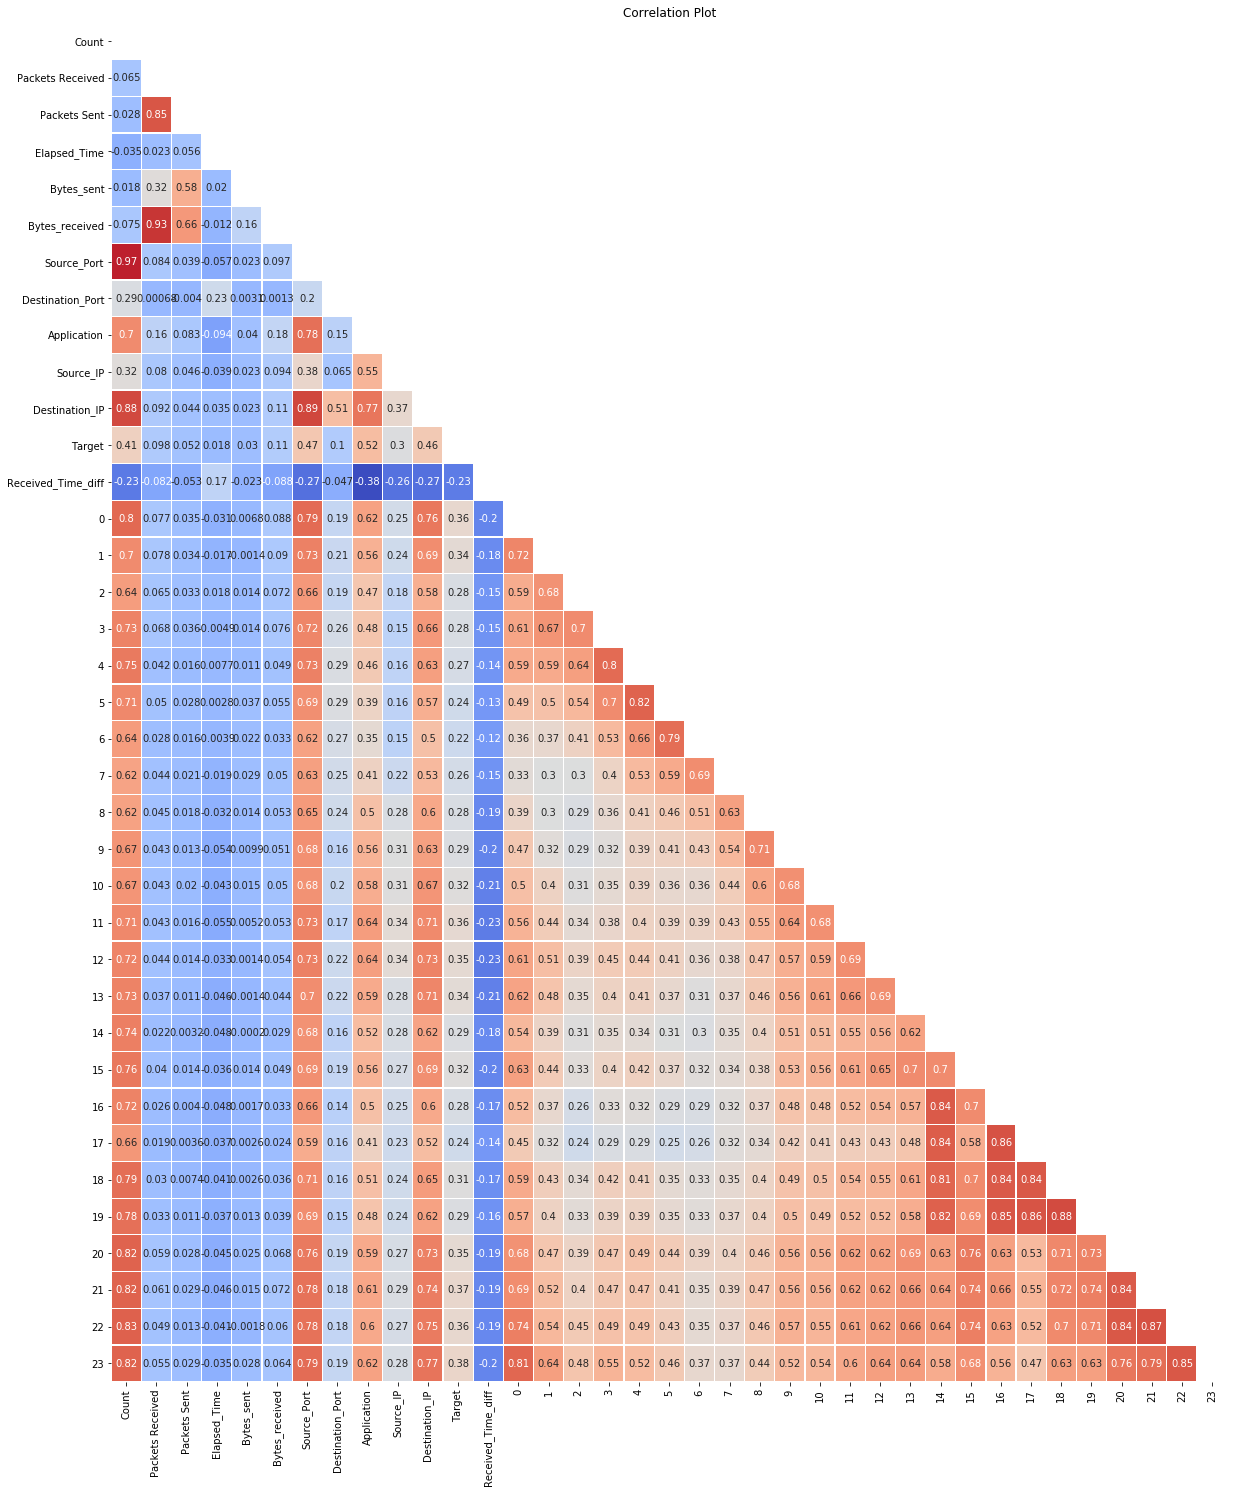

In [10]:
plt.figure(figsize=(20,25))
sns.heatmap(data=corr,annot=True,mask=mask,cbar=False,linewidths=0.2,cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

<a id='1' style="text-decoration : none; color : #000000;"><h2>50:50 Infected/Uninfected Users</h2> </a>

### Features included are  : 
<ol>
    <li> Number of times a user appears in the traffic logs</li>
    <li> Average number of Packets Received </li>
    <li> Average number of Packets Sent</li>
    <li> Average Elapsed Time </li>
    <li> Average number of Bytes sent</li>
    <li> Average number of Bytes Received</li>
    <li> Number of different Source Ports</li>
    <li> Number of different Destination Ports</li>
    <li> Number of different Source IP</li>
    <li> Number of different Destination IP</li>
    <li> Number of different Application Used </li>
    <li> The average differnece betweeen the time logs for that user</li>
    <li> The number of logs associated with a user for each hour of the day</li>
</ol>

### Taregt
Whether the user is infected or not

### Fetaure Vector

In [11]:
X=z.iloc[:,z.columns!='Target']
# X.set_index('Source_User',drop=True,inplace=True)
display(X.head(2))
X=X.values

Count  Packets Received  \
Source_User                                                                   
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...    658         67.658055   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...   1983         70.210792   

                                                    Packets Sent  \
Source_User                                                        
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...     59.463526   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...     41.299042   

                                                    Elapsed_Time  \
Source_User                                                        
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...     81.732523   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...     86.135653   

                                                      Bytes_sent  \
Source_User                                                        
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...  11103.895137   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...   4511.201715   

                                                    Bytes_received  \
Source_User                                                          
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...    74038.044073   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...    90146.424105   

                                                    Source_Port  \
Source_User                                                       
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...        635.0   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...       1822.0   

                                                    Destination_Port  \
Source_User                                                            
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...               7.0   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...               6.0   

                                                    Application  Source_IP  \
Source_User                                                                  
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...           32         14   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...           21         34   

                                                    Destination_IP  \
Source_User                                                          
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...             225   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...             531   

                                                    Received_Time_diff    0  \
Source_User                                                                   
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...         4066.069909   44   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...         1336.207766  174   

                                                      1    2   3    4   5   6  \
Source_User                                                                     
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...   16   27   7   12  32  16   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...  104  101  36  214  37  38   

                                                    7    8   9  10   11  12  \
Source_User                                                                   
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...  8   21  39  35   56  31   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...  9  112  81  11  125  66   

                                                     13  14  15  16   17  18  \
Source_User                                                                    
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...   23  14  29  28   36  21   
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542...  157  84  66  21  151  60   

                                                    19  20  21   22  23  
Source_User                                                              
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57...  14 

### Target

In [15]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
89d7a858135f84a3b3ac34d4949e6127d36cdb3a2ba0b57ed7563c289c7a55cc    1
74b5ce5d9866f5da70cc01117c7ad11dc8a9d4de43c1542aa623d0c9c05b4177    1
ca7203d9024ce539c4f14fdf74cb706d630e4c4b192824a691ad50b539d06e64    1
650f9e26cb8508db5b82e4d8969921a5e57adc17725b4c664da7a5a8f5936439    1
821f3ba0c79f0291a33e11b9ad251c8b51aa81c48d066d8b113694c65766f509    0
b1ea90d83619a4dc80d70848115ee5c3a76619f60166ee36888894c6c4ec109e    0
677f35067b776fdf48a3d8f972b999177a41b8150dc79a3170163b5e786d12dc    1
096280e9165d030bc10e0545809f83046e886703f91a33dcf94a3c6c3c616ab0    1
5bedc61ddab843f96f43bad4329bca4d9b9ca056c269acc74d8f405c360f3830    0
2f66997cf4e9189c4a8abcb72e8d9fff125dab20deb68025eca9cf664290ef61    1
Name: Target, dtype: int64

### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [17]:
print("Scaled Feature Vector")
display(scaled_X[0:2])

Scaled Feature Vector


array([[-0.43413345, -0.27072163, -0.08413222, -0.25110693, -0.06321946,
        -0.2918917 , -0.4731191 , -0.13581999,  0.39360034, -0.73666963,
        -0.38731187, -0.20332341, -0.2288329 , -0.4494111 , -0.28728793,
        -0.44236298, -0.38896526, -0.21633597, -0.29544696, -0.43905174,
        -0.38536852, -0.16241889, -0.21676342,  0.13357664, -0.33228871,
        -0.45103732, -0.5073438 , -0.28229341, -0.3153257 , -0.18848391,
        -0.40259323, -0.42273488, -0.45598479, -0.10939113, -0.34732262,
        -0.1658807 ],
       [ 0.36269133, -0.26060148, -0.19903372, -0.1981668 , -0.15320123,
        -0.23847872,  0.44922346, -0.14481984, -0.46357231,  0.4604062 ,
         0.45005528, -0.29548377,  1.0480976 ,  0.3552482 ,  0.24519177,
        -0.22082153,  1.11188362, -0.18201531, -0.14417368, -0.42985254,
         0.88179194,  0.5013037 , -0.63249752,  1.4048938 ,  0.3339337 ,
         1.7474025 ,  0.48213279,  0.31515964, -0.39800301,  0.8288181 ,
        -0.00194048, -0.18577

<a id='1.A' style="text-decoration : none; color : #000000;"><h3> 80:20 Train Test Split </h3></a>

In [22]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [23]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.748456790123

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          974    0      974
1            0  970      970
__all__    974  970     1944

Accuracy of the  KNN  model for test data is: 0.744855967078

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          177   64      241
1           60  185      245
__all__    237  249      486

### Logistic

In [25]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.744341563786

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0           754  220      974
1           273  697      970
__all__    1027  917     1944

Accuracy of the  Logistic  model for test data is: 0.746913580247

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          190   51      241
1           72  173      245
__all__    262  224      486

### Gaussain NB

In [26]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.692386831276


Predicted     0    1  __all__
Actual                       
0           843  131      974
1           467  503      970
__all__    1310  634     1944

             precision    recall  f1-score   support

          0       0.64      0.87      0.74       974
          1       0.79      0.52      0.63       970

avg / total       0.72      0.69      0.68      1944

Accuracy o f Gaussian NB on test data is: 0.666666666667


Predicted    0    1  __all__
Actual                      
0          210   31      241
1          131  114      245
__all__    341  145      486

### Random Forsest

In [27]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [28]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.765432098765


Predicted    0     1  __all__
Actual                       
0          703   271      974
1          185   785      970
__all__    888  1056     1944

Accuracy of Random Forest Model on test data is: 0.767489711934


Predicted    0    1  __all__
Actual                      
0          175   66      241
1           47  198      245
__all__    222  264      486

In [29]:
a=z.iloc[:,z.columns!='Target']

In [30]:
# a.set_index('Source_User',drop=True,inplace=True)

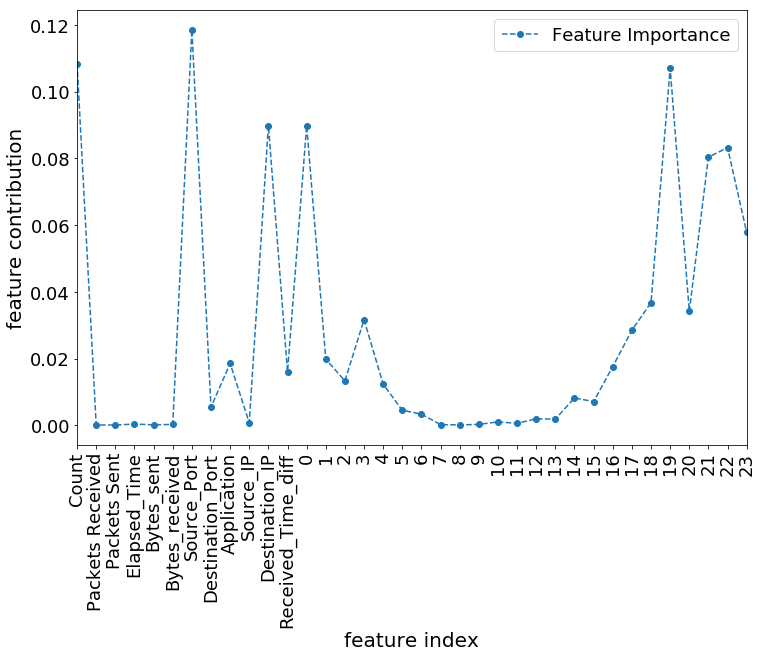

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.plot(rf.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### AdaBoost Classifier

In [32]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.75

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          693   281      974
1          175   795      970
__all__    868  1076     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.757201646091

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          169   72      241
1           46  199      245
__all__    215  271      486

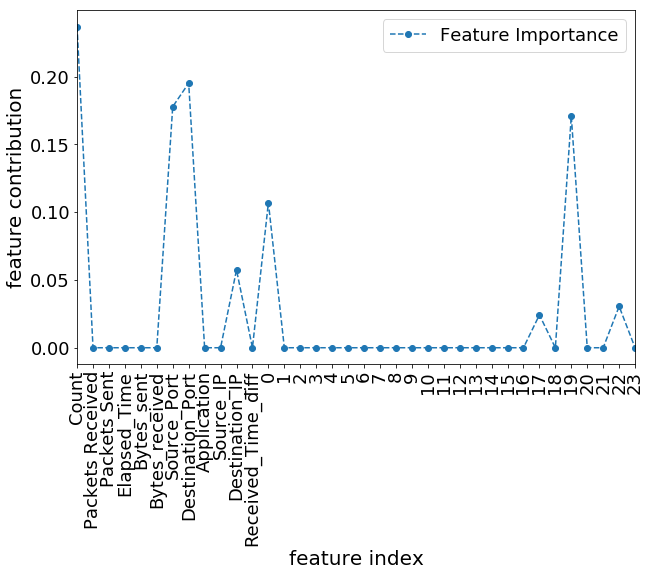

In [33]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(10, 6.5))
plt.plot(ada.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Gradient Boosting Classifier

In [34]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.763888888889

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          705   269      974
1          137   833      970
__all__    842  1102     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.769547325103

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          172   69      241
1           43  202      245
__all__    215  271      486

In [35]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.03,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=10,
              min_samples_split=0.1, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

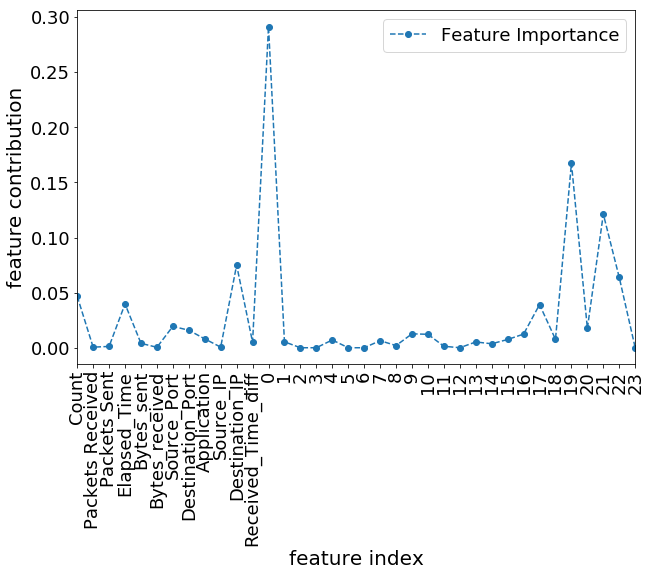

In [36]:
fig = plt.figure(figsize=(10, 6.5))
plt.plot(gbc.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

In [37]:
### Decision Tree Classifier
# tree=DecisionTreeClassifier()
# parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[15,20,35],
#                min_samples_split=[2,5],min_samples_leaf=[15,20],random_state=[0],min_impurity_decrease=[1e-1,1e-5,1e-3]
#                )
# d_tree_model=grid(tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

In [38]:
# tree=DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=15,
#                            min_samples_split=2,random_state=0,splitter='best')
# tree.fit(X_train,Y_train)
# fig = plt.figure(figsize=(15,12))
# plt.plot(tree.feature_importances_, '--o', label = 'Feature Importance')
# plt.ylabel('feature contribution', fontsize=20)
# plt.xlabel('feature index', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=18)
# plt.tick_params(axis='both', which='minor', labelsize=12)
# plt.xlim([0, 35])
# plt.xticks(np.arange(36),z.iloc[:,z.columns!='Target'].columns,rotation=90)
# plt.legend(loc='upper right', fontsize=18)
# plt.show()

### Extra Tree Classifier

In [39]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Decision Tree  model for training data is: 0.748971193416

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          687   287      974
1          182   788      970
__all__    869  1075     1944

Accuracy of the  Decision Tree  model for test data is: 0.763374485597

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          175   66      241
1           49  196      245
__all__    224  262      486

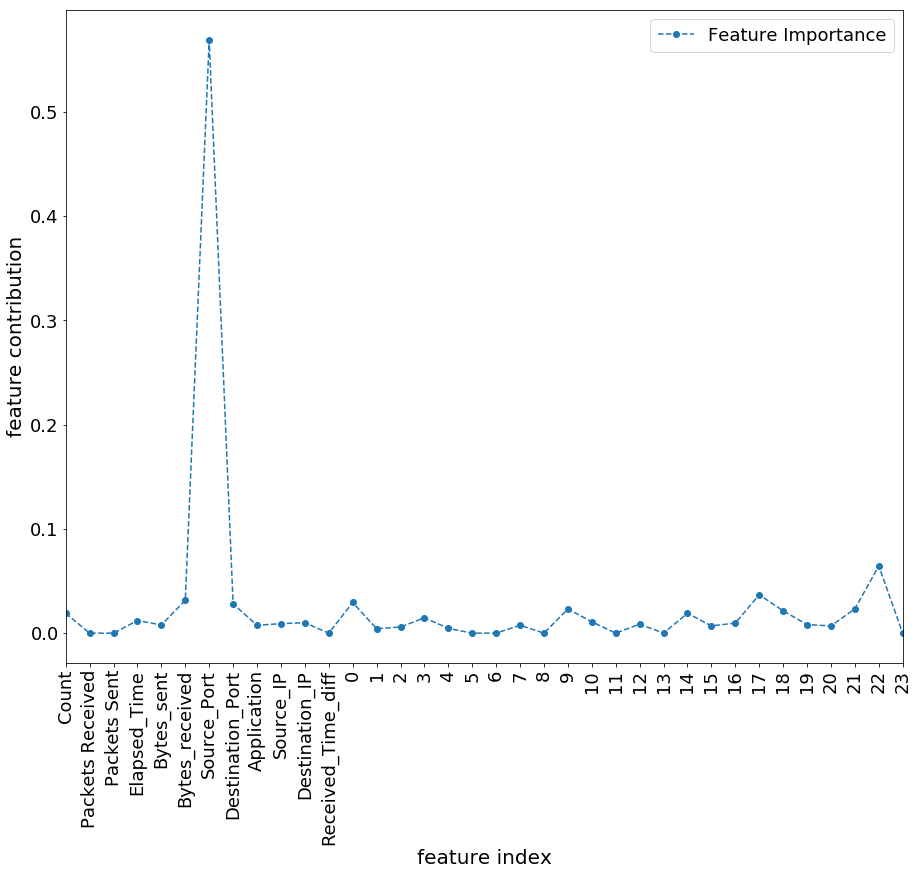

In [40]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

fig = plt.figure(figsize=(15,12))
plt.plot(ext_tree.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),z.iloc[:,z.columns!='Target'].columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Bagging Classifier

In [41]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[10000], max_samples=[0.4],max_features=[0.4],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4         10000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.764403292181

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          881    93      974
1           54   916      970
__all__    935  1009     1944

Accuracy of the  Bagging  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          170   71      241
1           46  199      245
__all__    216  270      486

### Neural Network

In [42]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [43]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [44]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.927983538849


In [45]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.681069958848


In [46]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [47]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [48]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [49]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd0528deba8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [51]:
grid_search.score(X_train,Y_train)

0.79115226337448563

In [52]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [53]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          173   68      241
1           54  191      245
__all__    227  259      486

In [54]:
(162+186)/486

0.7160493827160493

### Voting

In [55]:
from sklearn.ensemble import VotingClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')

logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=150,random_state=0)


gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)



ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')

bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=10000,oob_score=True,random_state=0)

In [71]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [72]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.825617283951


Predicted    0     1  __all__
Actual                       
0          764   210      974
1          129   841      970
__all__    893  1051     1944

The test accuracy is: 0.761316872428


Predicted    0    1  __all__
Actual                      
0          173   68      241
1           48  197      245
__all__    221  265      486

### Sklearn MLPClassifier

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          20             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.710905349794

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0           924   50      974
1           131  839      970
__all__    1055  889     1944

Accuracy of the  MLPClassifier  model for test data is: 0.711934156379

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          182   59      241
1           81  164      245
__all__    263  223      486

In [75]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=20,hidden_layer_sizes=(50,8),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='1.A.A' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [76]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [77]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [78]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [79]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [80]:
table_80.set_index(['index'],drop=True,inplace=True)

In [81]:
table_80

accuracy     TP     TN     FP     FN       FPR  \
index                                                                     
KNN_Train                1.000000  970.0  974.0    0.0    0.0  0.000000   
KNN_Test                 0.744856  185.0  177.0   64.0   60.0  0.244898   
Logistic_Train           0.748971  702.0  754.0  220.0  268.0  0.276289   
Logistic_Test            0.744856  172.0  190.0   51.0   73.0  0.297959   
Random_Forest_Train      0.765432  785.0  703.0  271.0  185.0  0.190722   
Random_Forest_Test       0.767490  198.0  175.0   66.0   47.0  0.191837   
Aadaboost_Train          0.765432  795.0  693.0  281.0  175.0  0.180412   
Adaboost_Test            0.757202  199.0  169.0   72.0   46.0  0.187755   
Gradient_Boosting Train  0.791152  833.0  705.0  269.0  137.0  0.141237   
Gradient_Boosting Test   0.769547  202.0  172.0   69.0   43.0  0.175510   
Extra Tree Train         0.951132  925.0  924.0   50.0   45.0  0.046392   
Extra Tree Test          0.701646  170.0  171.0   70.0   75.0  0.306122   
Bagging Train            0.924383  916.0  881.0   93.0   54.0  0.055670   
Bagging Test             0.759259  199.0  170.0   71.0   46.0  0.187755   
Deep_Learning_Train      0.927984  883.0  921.0   53.0   87.0  0.089691   
Deep_Learning_Test       0.681070  167.0  164.0   77.0   78.0  0.318367   
MLP_Train                0.906893  839.0  924.0   50.0  131.0  0.135052   
MLP_Test                 0.711934  164.0  182.0   59.0   81.0  0.330612   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.265560  
Logistic_Train           0.225873  
Logistic_Test            0.211618  
Random_Forest_Train      0.278234  
Random_Forest_Test       0.273859  
Aadaboost_Train          0.288501  
Adaboost_Test            0.298755  
Gradient_Boosting Train  0.276181  
Gradient_Boosting Test   0.286307  
Extra Tree Train         0.051335  
Extra Tree Test          0.290456  
Bagging Train            0.095483  
Bagging Test             0.294606  
Deep_Learning_Train      0.054415  
Deep_Learning_Test       0.319502  
MLP_Train                0.051335  
MLP_Test                 0.244813

<a id='1.B' style="text-decoration : none; color : #000000;"><h3> 75:25 Train Test Split </h3></a>

In [18]:
print("The train/test split ratio is 75:25")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 75:25


In [19]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.758507135016

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          900    0      900
1            0  922      922
__all__    900  922     1822

Accuracy of the  KNN  model for test data is: 0.751644736842

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          227   88      315
1           63  230      293
__all__    290  318      608

### Logistic

In [21]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001


Accuracy of the  Logistic  model for training data is: 0.741492864984

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          674  226      900
1          231  691      922
__all__    905  917     1822

Accuracy of the  Logistic  model for test data is: 0.751644736842

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          232   83      315
1           68  225      293
__all__    300  308      608

### Gaussain NB

In [22]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.692645444566


Predicted     0    1  __all__
Actual                       
0           777  123      900
1           437  485      922
__all__    1214  608     1822

             precision    recall  f1-score   support

          0       0.64      0.86      0.74       900
          1       0.80      0.53      0.63       922

avg / total       0.72      0.69      0.68      1822

Accuracy o f Gaussian NB on test data is: 0.723684210526


Predicted    0    1  __all__
Actual                      
0          274   41      315
1          127  166      293
__all__    401  207      608

### Random Forsest

In [23]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [24]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.762349066959


Predicted    0    1  __all__
Actual                      
0          653  247      900
1          186  736      922
__all__    839  983     1822

Accuracy of Random Forest Model on test data is: 0.764802631579


Predicted    0    1  __all__
Actual                      
0          226   89      315
1           54  239      293
__all__    280  328      608

In [25]:
a=z.iloc[:,z.columns!='Target']

In [26]:
# a.set_index('Source_User',drop=True,inplace=True)

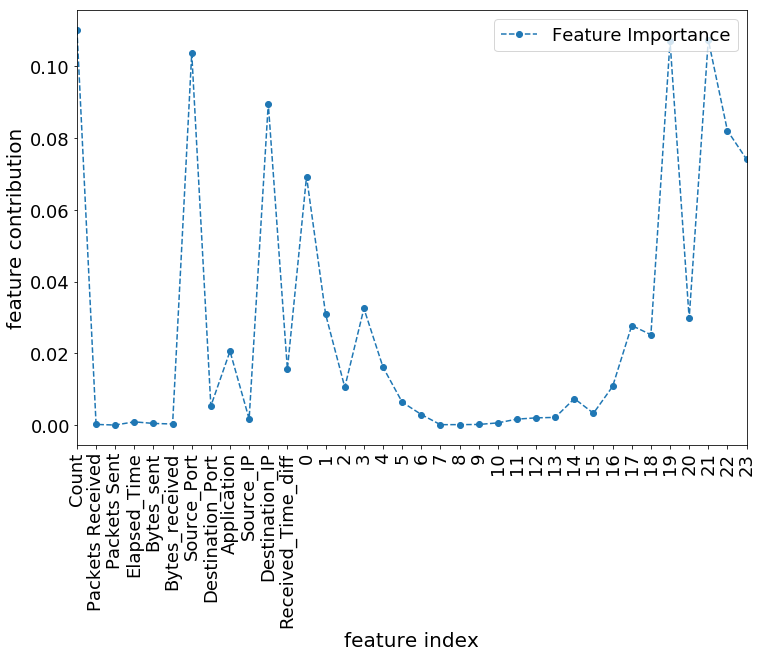

In [27]:
fig = plt.figure(figsize=(12, 8))
plt.plot(rf.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### AdaBoost Classifier

In [28]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.74972557629

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          655   245      900
1          153   769      922
__all__    808  1014     1822

Accuracy of the  AdaBoostClassifier  model for test data is: 0.759868421053

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          219   96      315
1           50  243      293
__all__    269  339      608

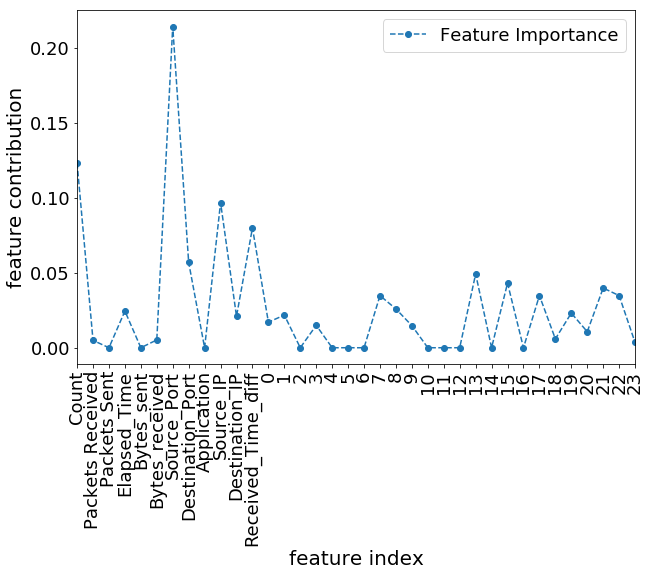

In [30]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(10, 6.5))
plt.plot(ada.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Gradient Boosting Classifier

In [33]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.771679473106

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          658   242      900
1          127   795      922
__all__    785  1037     1822

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.758223684211

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          218   97      315
1           50  243      293
__all__    268  340      608

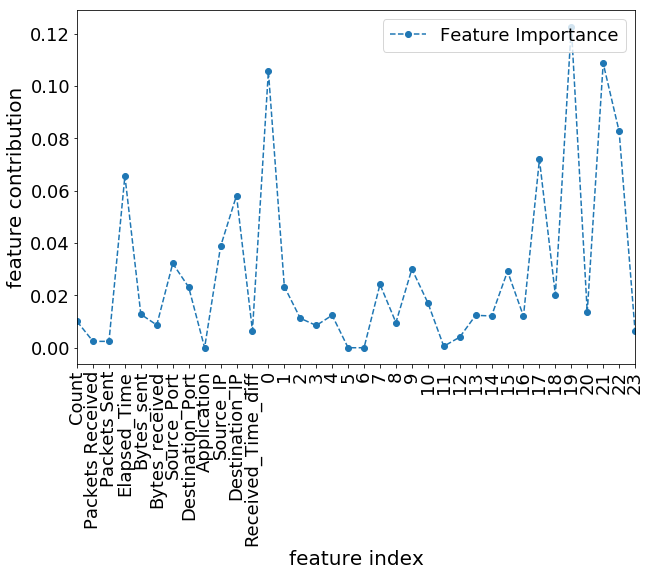

In [34]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

fig = plt.figure(figsize=(10, 6.5))
plt.plot(gbc.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Extra Tree Classifier

In [37]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Decision Tree  model for training data is: 0.753567508233

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          641   259      900
1          180   742      922
__all__    821  1001     1822

Accuracy of the  Decision Tree  model for test data is: 0.756578947368

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          220   95      315
1           53  240      293
__all__    273  335      608

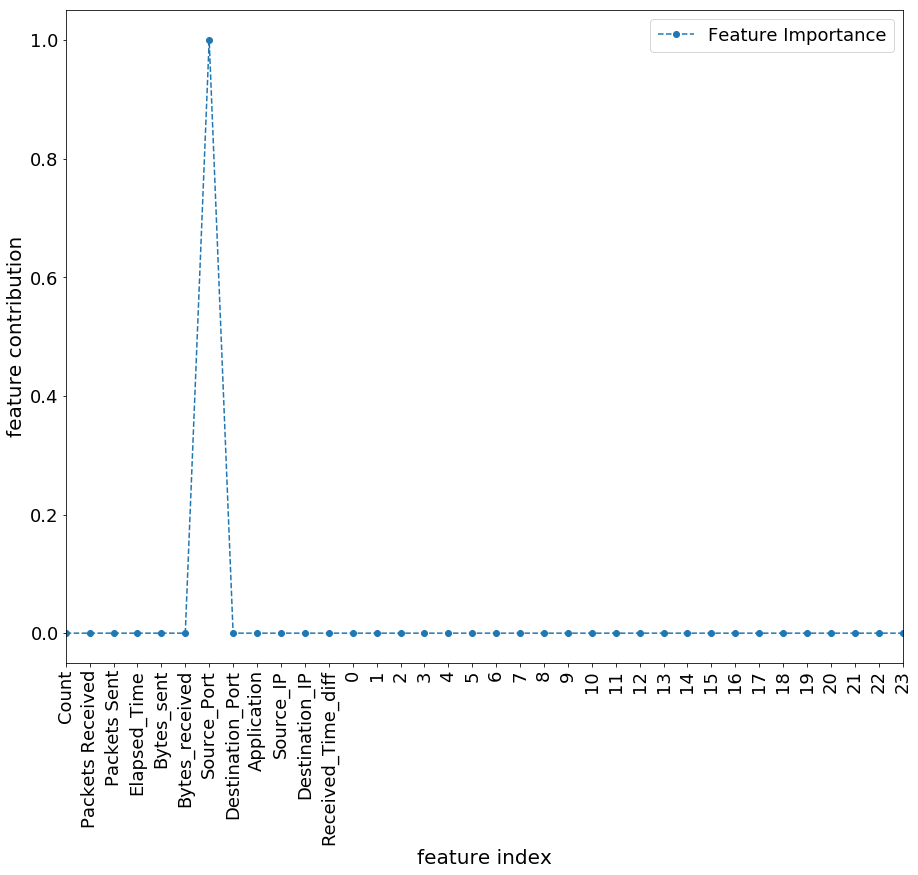

In [39]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

fig = plt.figure(figsize=(15,12))
plt.plot(ext_tree.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),z.iloc[:,z.columns!='Target'].columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Bagging Classifier

In [42]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.768386388584

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          809   91      900
1           52  870      922
__all__    861  961     1822

Accuracy of the  Bagging  model for test data is: 0.754934210526

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          216   99      315
1           50  243      293
__all__    266  342      608

### Neural Network

In [43]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [44]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [45]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.956641053787


In [46]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.702302631579


In [47]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [48]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [49]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [50]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [51]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2cfea289e8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [52]:
grid_search.score(X_train,Y_train)

0.79143798024149281

In [53]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [54]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          224   91      315
1           59  234      293
__all__    283  325      608

In [56]:
(224+234)/608

0.7532894736842105

### Voting

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')


logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.0011)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=150,random_state=0)

gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)

ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.6,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)

In [59]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [60]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.799121844127


Predicted    0     1  __all__
Actual                       
0          672   228      900
1          138   784      922
__all__    810  1012     1822

The test accuracy is: 0.761513157895


Predicted    0    1  __all__
Actual                      
0          225   90      315
1           55  238      293
__all__    280  328      608

### Sklearn MLPClassifier

In [61]:
from sklearn.neural_network import MLPClassifier

In [63]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          30           (100, 12)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.718441273326

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          869   31      900
1           73  849      922
__all__    942  880     1822

Accuracy of the  MLPClassifier  model for test data is: 0.694078947368

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          217   98      315
1           88  205      293
__all__    305  303      608

In [64]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(100,12),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='1.B.B' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [65]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [66]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [67]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [68]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [69]:
table_80.set_index(['index'],drop=True,inplace=True)

In [70]:
table_80

accuracy     TP     TN     FP     FN       FPR  \
index                                                                     
KNN_Train                1.000000  922.0  900.0    0.0    0.0  0.000000   
KNN_Test                 0.751645  230.0  227.0   88.0   63.0  0.215017   
Logistic_Train           0.749177  691.0  674.0  226.0  231.0  0.250542   
Logistic_Test            0.751645  225.0  232.0   83.0   68.0  0.232082   
Random_Forest_Train      0.762349  736.0  653.0  247.0  186.0  0.201735   
Random_Forest_Test       0.764803  239.0  226.0   89.0   54.0  0.184300   
Aadaboost_Train          0.781559  769.0  655.0  245.0  153.0  0.165944   
Adaboost_Test            0.759868  243.0  219.0   96.0   50.0  0.170648   
Gradient_Boosting Train  0.797475  795.0  658.0  242.0  127.0  0.137744   
Gradient_Boosting Test   0.758224  243.0  218.0   97.0   50.0  0.170648   
Extra Tree Train         0.759056  742.0  641.0  259.0  180.0  0.195228   
Extra Tree Test          0.756579  240.0  220.0   95.0   53.0  0.180887   
Bagging Train            0.921515  870.0  809.0   91.0   52.0  0.056399   
Bagging Test             0.754934  243.0  216.0   99.0   50.0  0.170648   
Deep_Learning_Train      0.956641  862.0  881.0   19.0   60.0  0.065076   
Deep_Learning_Test       0.702303  205.0  222.0   93.0   88.0  0.300341   
MLP_Train                0.942920  849.0  869.0   31.0   73.0  0.079176   
MLP_Test                 0.694079  205.0  217.0   98.0   88.0  0.300341   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.279365  
Logistic_Train           0.251111  
Logistic_Test            0.263492  
Random_Forest_Train      0.274444  
Random_Forest_Test       0.282540  
Aadaboost_Train          0.272222  
Adaboost_Test            0.304762  
Gradient_Boosting Train  0.268889  
Gradient_Boosting Test   0.307937  
Extra Tree Train         0.287778  
Extra Tree Test          0.301587  
Bagging Train            0.101111  
Bagging Test             0.314286  
Deep_Learning_Train      0.021111  
Deep_Learning_Test       0.295238  
MLP_Train                0.034444  
MLP_Test                 0.311111

<a id='1.C' style="text-decoration : none; color : #000000;"><h3> 80:20 Train Test Split with PCA</h3></a>

In [71]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_12=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 15 components is: 0.904967289793


In [72]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_12,Y,random_state=0,test_size=0.2)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [73]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.729938271605

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          971    0      971
1            0  973      973
__all__    971  973     1944

Accuracy of the  KNN  model for test data is: 0.730452674897

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          190   54      244
1           77  165      242
__all__    267  219      486

### Logistic

In [75]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.74537037037

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          730  241      971
1          244  729      973
__all__    974  970     1944

Accuracy of the  Logistic  model for test data is: 0.751028806584

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          179   65      244
1           56  186      242
__all__    235  251      486

### Gaussain NB

In [81]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.651748971193


Predicted     0    1  __all__
Actual                       
0           838  133      971
1           544  429      973
__all__    1382  562     1944

             precision    recall  f1-score   support

          0       0.61      0.86      0.71       971
          1       0.76      0.44      0.56       973

avg / total       0.68      0.65      0.64      1944

Accuracy o f Gaussian NB on test data is: 0.627572016461


Predicted    0    1  __all__
Actual                      
0          211   33      244
1          148   94      242
__all__    359  127      486

### Random Forsest

In [77]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [82]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.75462962963


Predicted    0     1  __all__
Actual                       
0          651   320      971
1          157   816      973
__all__    808  1136     1944

Accuracy of Random Forest Model on test data is: 0.759259259259


Predicted    0    1  __all__
Actual                      
0          163   81      244
1           36  206      242
__all__    199  287      486

### AdaBoost Classifier

In [86]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.747942386831

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          707   264      971
1          209   764      973
__all__    916  1028     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          173   71      244
1           46  196      242
__all__    219  267      486

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
          n_estimators=100, random_state=0)

### Gradient Boosting Classifier

In [92]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                   0.08           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.758230452675

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          711   260      971
1          161   812      973
__all__    872  1072     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.761316872428

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          172   72      244
1           44  198      242
__all__    216  270      486

### Extra Tree Classifier

In [96]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[5,10,20],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                 10             0      best


Accuracy of the  Decision Tree  model for training data is: 0.715534979424

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          683   288      971
1          105   868      973
__all__    788  1156     1944

Accuracy of the  Decision Tree  model for test data is: 0.742798353909

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          152   92      244
1           33  209      242
__all__    185  301      486

### Bagging Classifier

In [99]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.752572016461

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          915   56      971
1           38  935      973
__all__    953  991     1944

Accuracy of the  Bagging  model for test data is: 0.753086419753

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          165   79      244
1           41  201      242
__all__    206  280      486

### Neural Network

In [100]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [104]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [105]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.872427983294


In [106]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.705761316872


In [107]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [108]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [109]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [110]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [111]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2c0f70b2e8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [112]:
grid_search.score(X_train,Y_train)

0.78086419753086422

In [113]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [114]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          155   89      244
1           29  213      242
__all__    184  302      486

In [116]:
(155+213)/486

0.757201646090535

### Voting

In [117]:
from sklearn.ensemble import VotingClassifier

In [118]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')


logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=False,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='newton-cg',tol=1e-5)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=100,random_state=0)

gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.08,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)

ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.0001,min_samples_leaf=3,
                            min_samples_split=10,random_state=0,splitter='best')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.6,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)

In [119]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [120]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.810185185185


Predicted    0     1  __all__
Actual                       
0          742   229      971
1          140   833      973
__all__    882  1062     1944

The test accuracy is: 0.753086419753


Predicted    0    1  __all__
Actual                      
0          170   74      244
1           46  196      242
__all__    216  270      486

### Sklearn MLPClassifier

In [121]:
from sklearn.neural_network import MLPClassifier

In [122]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          30             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.734053497942

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          861  110      971
1          138  835      973
__all__    999  945     1944

Accuracy of the  MLPClassifier  model for test data is: 0.691358024691

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          170   74      244
1           76  166      242
__all__    246  240      486

In [123]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(100,12),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='1.C.C' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [124]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [125]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [126]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [127]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [128]:
table_80.set_index(['index'],drop=True,inplace=True)

In [129]:
table_80

accuracy     TP     TN     FP     FN       FPR  \
index                                                                     
KNN_Train                1.000000  973.0  971.0    0.0    0.0  0.000000   
KNN_Test                 0.730453  165.0  190.0   54.0   77.0  0.318182   
Logistic_Train           0.750514  729.0  730.0  241.0  244.0  0.250771   
Logistic_Test            0.751029  186.0  179.0   65.0   56.0  0.231405   
Random_Forest_Train      0.754630  816.0  651.0  320.0  157.0  0.161357   
Random_Forest_Test       0.759259  206.0  163.0   81.0   36.0  0.148760   
Aadaboost_Train          0.756687  764.0  707.0  264.0  209.0  0.214800   
Adaboost_Test            0.759259  196.0  173.0   71.0   46.0  0.190083   
Gradient_Boosting Train  0.783436  812.0  711.0  260.0  161.0  0.165468   
Gradient_Boosting Test   0.761317  198.0  172.0   72.0   44.0  0.181818   
Extra Tree Train         0.885288  845.0  876.0   95.0  128.0  0.131552   
Extra Tree Test          0.625514  151.0  153.0   91.0   91.0  0.376033   
Bagging Train            0.951646  935.0  915.0   56.0   38.0  0.039054   
Bagging Test             0.753086  201.0  165.0   79.0   41.0  0.169421   
Deep_Learning_Train      0.872428  863.0  833.0  138.0  110.0  0.113052   
Deep_Learning_Test       0.705761  180.0  163.0   81.0   62.0  0.256198   
MLP_Train                0.908436  856.0  910.0   61.0  117.0  0.120247   
MLP_Test                 0.658436  150.0  170.0   74.0   92.0  0.380165   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.221311  
Logistic_Train           0.248198  
Logistic_Test            0.266393  
Random_Forest_Train      0.329557  
Random_Forest_Test       0.331967  
Aadaboost_Train          0.271885  
Adaboost_Test            0.290984  
Gradient_Boosting Train  0.267765  
Gradient_Boosting Test   0.295082  
Extra Tree Train         0.097837  
Extra Tree Test          0.372951  
Bagging Train            0.057673  
Bagging Test             0.323770  
Deep_Learning_Train      0.142122  
Deep_Learning_Test       0.331967  
MLP_Train                0.062822  
MLP_Test                 0.303279

<a id='1.D' style="text-decoration : none; color : #000000;"><h3> 75:25 Train/Test Split with PCA </h3></a>

In [130]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_12=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 15 components is: 0.904967289793


In [132]:
print("The train/test split ratio is 75:25")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_12,Y,random_state=0,test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 75:25


In [133]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           20  distance


Accuracy of the  KNN  model for training data is: 0.726673984632

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          900    0      900
1            0  922      922
__all__    900  922     1822

Accuracy of the  KNN  model for test data is: 0.735197368421

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          245   70      315
1           91  202      293
__all__    336  272      608

### Logistic

In [135]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5       100          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001


Accuracy of the  Logistic  model for training data is: 0.744785949506

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          671  229      900
1          231  691      922
__all__    902  920     1822

Accuracy of the  Logistic  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          234   81      315
1           71  222      293
__all__    305  303      608

### Gaussain NB

In [136]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.638309549945


Predicted     0    1  __all__
Actual                       
0           773  127      900
1           532  390      922
__all__    1305  517     1822

             precision    recall  f1-score   support

          0       0.59      0.86      0.70       900
          1       0.75      0.42      0.54       922

avg / total       0.67      0.64      0.62      1822

Accuracy o f Gaussian NB on test data is: 0.652960526316


Predicted    0    1  __all__
Actual                      
0          279   36      315
1          175  118      293
__all__    454  154      608

### Random Forsest

In [137]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [138]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.757958287596


Predicted    0     1  __all__
Actual                       
0          603   297      900
1          144   778      922
__all__    747  1075     1822

Accuracy of Random Forest Model on test data is: 0.754934210526


Predicted    0    1  __all__
Actual                      
0          214  101      315
1           48  245      293
__all__    262  346      608

### AdaBoost Classifier

In [139]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.756311745335

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          660  240      900
1          175  747      922
__all__    835  987     1822

Accuracy of the  AdaBoostClassifier  model for test data is: 0.751644736842

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          225   90      315
1           61  232      293
__all__    286  322      608

### Gradient Boosting Classifier

In [140]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           150             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.766739846323

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          682   218      900
1          140   782      922
__all__    822  1000     1822

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.758223684211

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          224   91      315
1           56  237      293
__all__    280  328      608

### Extra Tree Classifier

In [141]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[5,10,20],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  5             0      best


Accuracy of the  Decision Tree  model for training data is: 0.717892425906

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          695  205      900
1          146  776      922
__all__    841  981     1822

Accuracy of the  Decision Tree  model for test data is: 0.722039473684

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          217   98      315
1           71  222      293
__all__    288  320      608

### Bagging Classifier

In [142]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.755762897914

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          787  113      900
1           65  857      922
__all__    852  970     1822

Accuracy of the  Bagging  model for test data is: 0.754934210526

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          216   99      315
1           50  243      293
__all__    266  342      608

### Neural Network

In [143]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [144]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [145]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.884193193899


In [146]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.715460526316


In [147]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [148]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [149]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [150]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [151]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2c03daf208>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [152]:
grid_search.score(X_train,Y_train)

0.77826564215148186

In [153]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [154]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          241   74      315
1           79  214      293
__all__    320  288      608

In [155]:
(241+214)/608

0.7483552631578947

### Voting

In [156]:
from sklearn.ensemble import VotingClassifier

In [157]:

knn=KNeighborsClassifier(n_neighbors=20,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')

logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=1e-3)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)


ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=50,random_state=0)


gbc=GradientBoostingClassifier(n_estimators=150,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.05)


ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.0001,min_samples_leaf=3,
                            min_samples_split=5,random_state=0,splitter='best')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.6,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)

In [158]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [159]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.827113062569


Predicted    0    1  __all__
Actual                      
0          707  193      900
1          122  800      922
__all__    829  993     1822

The test accuracy is: 0.75


Predicted    0    1  __all__
Actual                      
0          221   94      315
1           58  235      293
__all__    279  329      608

### Sklearn MLPClassifier

In [160]:
from sklearn.neural_network import MLPClassifier

In [161]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            relu  0.001          20             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.715697036224

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          754  146      900
1          125  797      922
__all__    879  943     1822

Accuracy of the  MLPClassifier  model for test data is: 0.726973684211

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          223   92      315
1           74  219      293
__all__    297  311      608

In [162]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(100,12),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='1.D.D' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [163]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [164]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [165]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [166]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [167]:
table_80.set_index(['index'],drop=True,inplace=True)

In [169]:
table_80

accuracy     TP     TN     FP     FN       FPR  \
index                                                                     
KNN_Train                1.000000  922.0  900.0    0.0    0.0  0.000000   
KNN_Test                 0.735197  202.0  245.0   70.0   91.0  0.310580   
Logistic_Train           0.748079  691.0  672.0  228.0  231.0  0.250542   
Logistic_Test            0.748355  222.0  233.0   82.0   71.0  0.242321   
Random_Forest_Train      0.757958  778.0  603.0  297.0  144.0  0.156182   
Random_Forest_Test       0.754934  245.0  214.0  101.0   48.0  0.163823   
Aadaboost_Train          0.772228  747.0  660.0  240.0  175.0  0.189805   
Adaboost_Test            0.751645  232.0  225.0   90.0   61.0  0.208191   
Gradient_Boosting Train  0.803513  782.0  682.0  218.0  140.0  0.151844   
Gradient_Boosting Test   0.758224  237.0  224.0   91.0   56.0  0.191126   
Extra Tree Train         0.872119  796.0  793.0  107.0  126.0  0.136659   
Extra Tree Test          0.679276  192.0  221.0   94.0  101.0  0.344710   
Bagging Train            0.902305  857.0  787.0  113.0   65.0  0.070499   
Bagging Test             0.754934  243.0  216.0   99.0   50.0  0.170648   
Deep_Learning_Train      0.884193  808.0  803.0   97.0  114.0  0.123644   
Deep_Learning_Test       0.715461  213.0  222.0   93.0   80.0  0.273038   
MLP_Train                0.900659  811.0  830.0   70.0  111.0  0.120390   
MLP_Test                 0.722039  207.0  232.0   83.0   86.0  0.293515   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.222222  
Logistic_Train           0.253333  
Logistic_Test            0.260317  
Random_Forest_Train      0.330000  
Random_Forest_Test       0.320635  
Aadaboost_Train          0.266667  
Adaboost_Test            0.285714  
Gradient_Boosting Train  0.242222  
Gradient_Boosting Test   0.288889  
Extra Tree Train         0.118889  
Extra Tree Test          0.298413  
Bagging Train            0.125556  
Bagging Test             0.314286  
Deep_Learning_Train      0.107778  
Deep_Learning_Test       0.295238  
MLP_Train                0.077778  
MLP_Test                 0.263492

## Change in Number of Infected/Uninfected Users
<a id='2' style="text-decoration : none; color : #000000;"><h3>70:30 Uninfected/Infected  </h3></a>

In [171]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')

In [177]:
z.set_index(['Source_User'],drop=True,inplace=True)
z.head(2)

Count  Packets Received  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   2526        152.272763   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   2507        132.393299   

                                                    Packets Sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    115.762470   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     56.954128   

                                                    Elapsed_Time  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    102.322249   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     90.832469   

                                                      Bytes_sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18103.792953   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   7080.045473   

                                                    Bytes_received  \
Source_User                                                          
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   187670.846397   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   157025.019944   

                                                    Source_Port  \
Source_User                                                       
f312c5ac2868560b18b854fe68465445253bb1850ca9092...       2247.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...       2332.0   

                                                    Destination_Port  \
Source_User                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...              16.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...              13.0   

                                                    Application  Source_IP  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...           42         15   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...           43         45   

                                                    Destination_IP  Target  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...             641       1   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...             708       0   

                                                    Received_Time_diff    0  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...         1059.323040  148   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...         1061.297567   78   

                                                      1   2   3   4   5   6  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  203  90  50  35  47  41   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   75  56  34  15  40  46   

                                                     7   8   9   10   11  12  \
Source_User                                                                    
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18  75  50   84  120  64   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...  45  95  83  152  106  98   

                                                     13   14  15   16   17  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  147  139  85  103  126   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   86  105  84  215  254   

                                                     18   19   20   21   22  \
Source_User                                                                   
f312c5ac2868560b18b854fe6

In [178]:
z.Target.value_counts()

0    2832
1    1215
Name: Target, dtype: int64

In [179]:
X=z.iloc[:,z.columns!='Target']
# X.set_index('Source_User',drop=True,inplace=True)
display(X.head(2))
X=X.values

Count  Packets Received  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   2526        152.272763   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   2507        132.393299   

                                                    Packets Sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    115.762470   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     56.954128   

                                                    Elapsed_Time  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    102.322249   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     90.832469   

                                                      Bytes_sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18103.792953   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   7080.045473   

                                                    Bytes_received  \
Source_User                                                          
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   187670.846397   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   157025.019944   

                                                    Source_Port  \
Source_User                                                       
f312c5ac2868560b18b854fe68465445253bb1850ca9092...       2247.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...       2332.0   

                                                    Destination_Port  \
Source_User                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...              16.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...              13.0   

                                                    Application  Source_IP  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...           42         15   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...           43         45   

                                                    Destination_IP  \
Source_User                                                          
f312c5ac2868560b18b854fe68465445253bb1850ca9092...             641   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...             708   

                                                    Received_Time_diff    0  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...         1059.323040  148   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...         1061.297567   78   

                                                      1   2   3   4   5   6  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  203  90  50  35  47  41   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   75  56  34  15  40  46   

                                                     7   8   9   10   11  12  \
Source_User                                                                    
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18  75  50   84  120  64   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...  45  95  83  152  106  98   

                                                     13   14  15   16   17  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  147  139  85  103  126   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   86  105  84  215  254   

                                                     18   19   20   21   22  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  107  

### Target

In [180]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
f312c5ac2868560b18b854fe68465445253bb1850ca9092ad26568c74031b027    1
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48ba414cda7056e4148e    0
d5e24bf16e5ead683f89048d5e246023b1f9afe95a7899325c3d3c205e0203d1    1
2c5959312c696157dfa0c133ddef78aea760fc079df27053211b90718b0ebf34    1
13d8051aaf87a6f2bdadbc3c3f05fb30a872632dc1b3399b754d3e1f74d072d5    1
b819ca77e1a3799479b6db7e66b226534bd358db204bbb2ac3fa27c4d4a29994    0
a36e078cca4c68fd1ab05e6e7e585eda8839e799347dc44a1cf70bc4c8c53d39    1
d3a5980a8d883c5dee97b59db0a89b103eda5ce627480213c63c9b1a33166d33    0
417d6924cda955a2711482a8bb5b07f6927efbb8568f071bf7fbcd16ebdf4b8a    0
e7c2a06c192ffcb4ad05df3f097eaf3a4cca2ee01df5ebcb6df4e20b1b5d05d8    0
Name: Target, dtype: int64

### Scaling

In [181]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [182]:
print("Scaled Feature Vector")
display(scaled_X[0:2])

Scaled Feature Vector


array([[  7.08584226e-01,   1.00458942e-01,   3.26806205e-01,
          1.33125340e-02,   6.79357519e-02,   1.17702290e-01,
          1.00742238e+00,  -3.18280228e-02,   1.38642272e+00,
         -5.73369609e-01,   9.51661219e-01,  -3.52840839e-01,
          4.83566592e-01,   6.75063551e-01,   1.63764248e-01,
         -1.05324717e-02,  -1.07221840e-01,  -2.63644024e-02,
         -4.77087948e-02,  -2.67810006e-01,   5.24644767e-01,
          1.47202604e-01,   8.25598975e-01,   1.33122647e+00,
          3.52833599e-01,   1.77485966e+00,   1.47304863e+00,
          7.24066404e-01,   7.62830496e-01,   5.48426105e-01,
          6.77085462e-01,   8.99647440e-01,   5.63923423e-01,
          1.48113664e+00,   1.22824996e+00,   8.66335967e-01],
       [  6.98964282e-01,   2.14443664e-02,  -8.03109851e-02,
         -1.00132821e-01,  -1.16476886e-01,   1.93038174e-02,
          1.07624014e+00,  -5.46771255e-02,   1.46444442e+00,
          1.26546612e+00,   1.13889700e+00,  -3.52784240e-01,
       

<a id='2.A' style="text-decoration : none; color : #000000;"><h3> 80:20 Train Test Split </h3></a>

In [183]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [184]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          5  chebyshev           30  distance


Accuracy of the  KNN  model for training data is: 0.751621872104

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2263    0     2263
1             0  974      974
__all__    2263  974     3237

Accuracy of the  KNN  model for test data is: 0.783950617284

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          502   67      569
1          108  133      241
__all__    610  200      810

### Logistic

In [186]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  liblinear  0.001


Accuracy of the  Logistic  model for training data is: 0.75656472042

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1986  277     2263
1           486  488      974
__all__    2472  765     3237

Accuracy of the  Logistic  model for test data is: 0.79012345679

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          503   66      569
1          104  137      241
__all__    607  203      810

### Gaussain NB

In [187]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.758727216559


Predicted     0     1  __all__
Actual                        
0          1842   421     2263
1           360   614      974
__all__    2202  1035     3237

             precision    recall  f1-score   support

          0       0.84      0.81      0.83      2263
          1       0.59      0.63      0.61       974

avg / total       0.76      0.76      0.76      3237

Accuracy o f Gaussian NB on test data is: 0.792592592593


Predicted    0    1  __all__
Actual                      
0          471   98      569
1           70  171      241
__all__    541  269      810

### Random Forsest

In [188]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [189]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.763052208835


Predicted     0    1  __all__
Actual                       
0          1932  331     2263
1           436  538      974
__all__    2368  869     3237

Accuracy of Random Forest Model on test data is: 0.797530864198


Predicted    0    1  __all__
Actual                      
0          496   73      569
1           91  150      241
__all__    587  223      810

In [190]:
a=z.iloc[:,z.columns!='Target']

In [191]:
# a.set_index('Source_User',drop=True,inplace=True)

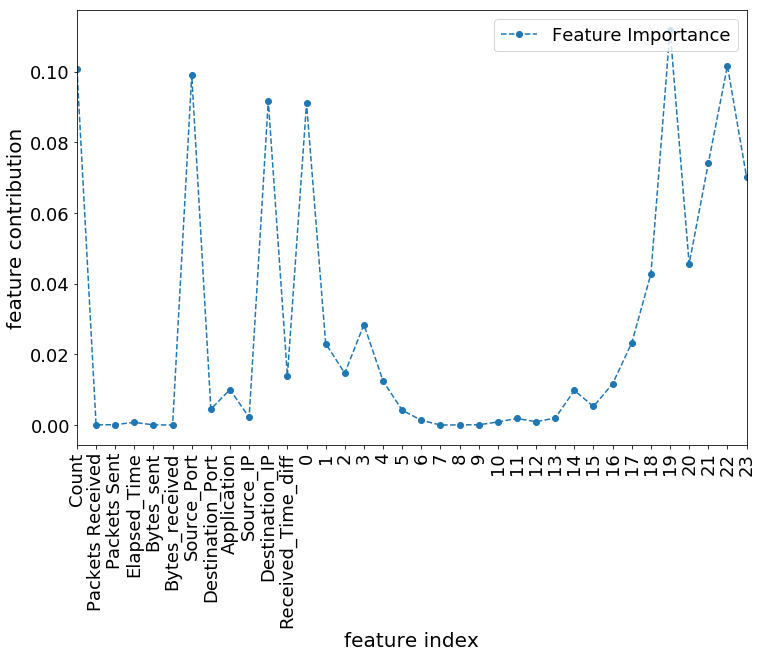

In [192]:
fig = plt.figure(figsize=(12, 8))
plt.plot(rf.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### AdaBoost Classifier

In [193]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.763052208835

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1905  358     2263
1           386  588      974
__all__    2291  946     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.785185185185

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          485   84      569
1           90  151      241
__all__    575  235      810

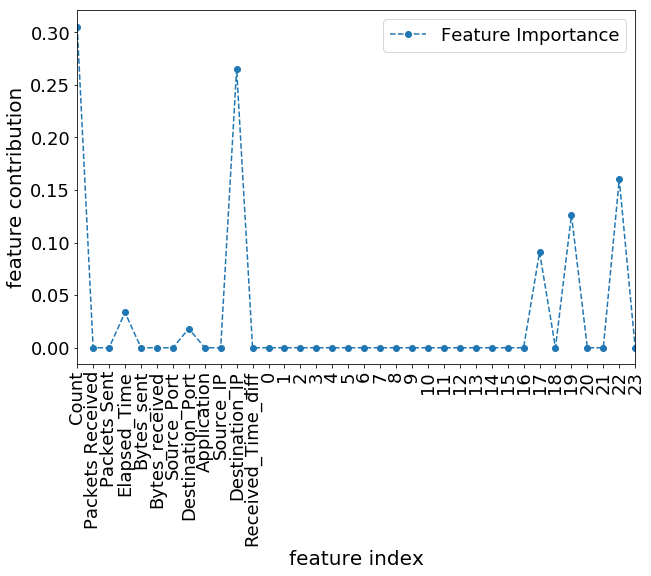

In [194]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(10, 6.5))
plt.plot(ada.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Gradient Boosting Classifier

In [195]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.755946864381

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2065  198     2263
1           502  472      974
__all__    2567  670     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.788888888889

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          520   49      569
1          122  119      241
__all__    642  168      810

In [196]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.03,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=10,
              min_samples_split=0.1, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

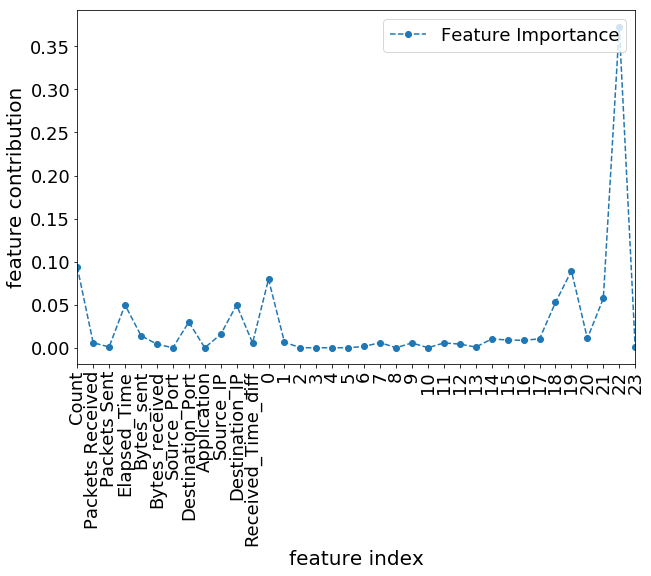

In [197]:
fig = plt.figure(figsize=(10, 6.5))
plt.plot(gbc.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Extra Tree Classifier

In [198]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Decision Tree  model for training data is: 0.750386160025

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1860  403     2263
1           391  583      974
__all__    2251  986     3237

Accuracy of the  Decision Tree  model for test data is: 0.772839506173

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          462  107      569
1           77  164      241
__all__    539  271      810

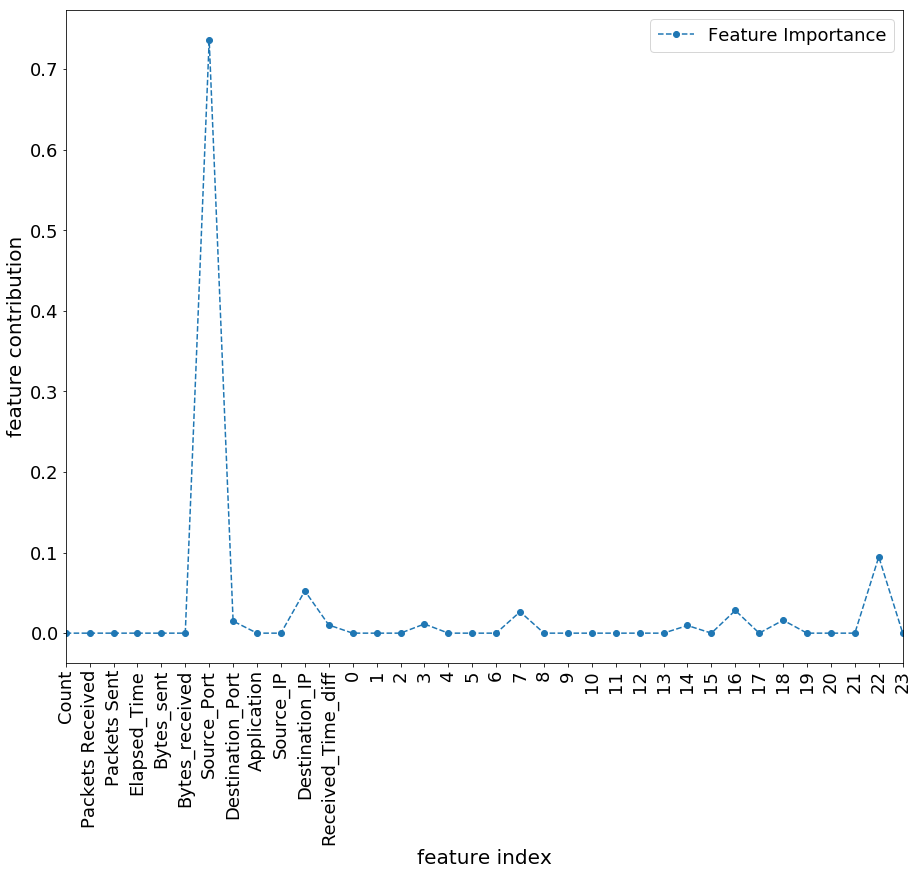

In [199]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

fig = plt.figure(figsize=(15,12))
plt.plot(ext_tree.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),z.iloc[:,z.columns!='Target'].columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Bagging Classifier

In [200]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[500], max_samples=[0.4,0.3],max_features=[0.4,0.5],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.5          0.3           500   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.771084337349

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2212   51     2263
1           176  798      974
__all__    2388  849     3237

Accuracy of the  Bagging  model for test data is: 0.806172839506

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          497   72      569
1           85  156      241
__all__    582  228      810

### Neural Network

In [201]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [202]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [203]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.961075069509


In [204]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.73950617284


In [205]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [206]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [207]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [208]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [209]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2bf7fe4fd0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [210]:
grid_search.score(X_train,Y_train)

0.8069199876428792

In [211]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [212]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          488   81      569
1           76  165      241
__all__    564  246      810

In [214]:
(488+165)/810

0.8061728395061728

### Voting

In [215]:
from sklearn.ensemble import VotingClassifier

In [216]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=5,metric='chebyshev',algorithm='auto')


logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='liblinear',tol=0.001)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=150,random_state=0)


gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)


ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='random')

bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.5,max_samples=0.3,n_estimators=500,oob_score=True,random_state=0)

In [217]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [218]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.820821748533


Predicted     0    1  __all__
Actual                       
0          2050  213     2263
1           367  607      974
__all__    2417  820     3237

The test accuracy is: 0.806172839506


Predicted    0    1  __all__
Actual                      
0          501   68      569
1           89  152      241
__all__    590  220      810

### Sklearn MLPClassifier

In [219]:
from sklearn.neural_network import MLPClassifier

In [220]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          30             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.740191535372

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2187   76     2263
1           138  836      974
__all__    2325  912     3237

Accuracy of the  MLPClassifier  model for test data is: 0.734567901235

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          460  109      569
1          106  135      241
__all__    566  244      810

In [222]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(50,8),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='2.A.A' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [223]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [224]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [225]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [226]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [227]:
table_80.set_index(['index'],drop=True,inplace=True)

In [228]:
table_80

accuracy     TP      TN     FP     FN       FPR  \
index                                                                      
KNN_Train                1.000000  974.0  2263.0    0.0    0.0  0.000000   
KNN_Test                 0.783951  133.0   502.0   67.0  108.0  0.448133   
Logistic_Train           0.764288  488.0  1986.0  277.0  486.0  0.498973   
Logistic_Test            0.790123  137.0   503.0   66.0  104.0  0.431535   
Random_Forest_Train      0.763052  538.0  1932.0  331.0  436.0  0.447639   
Random_Forest_Test       0.797531  150.0   496.0   73.0   91.0  0.377593   
Aadaboost_Train          0.770158  588.0  1905.0  358.0  386.0  0.396304   
Adaboost_Test            0.785185  151.0   485.0   84.0   90.0  0.373444   
Gradient_Boosting Train  0.783750  472.0  2065.0  198.0  502.0  0.515400   
Gradient_Boosting Test   0.788889  119.0   520.0   49.0  122.0  0.506224   
Extra Tree Train         0.754711  583.0  1860.0  403.0  391.0  0.401437   
Extra Tree Test          0.772840  164.0   462.0  107.0   77.0  0.319502   
Bagging Train            0.929873  798.0  2212.0   51.0  176.0  0.180698   
Bagging Test             0.806173  156.0   497.0   72.0   85.0  0.352697   
Deep_Learning_Train      0.961075  856.0  2255.0    8.0  118.0  0.121150   
Deep_Learning_Test       0.739506  124.0   475.0   94.0  117.0  0.485477   
MLP_Train                0.933889  836.0  2187.0   76.0  138.0  0.141684   
MLP_Test                 0.734568  135.0   460.0  109.0  106.0  0.439834   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.117750  
Logistic_Train           0.122404  
Logistic_Test            0.115993  
Random_Forest_Train      0.146266  
Random_Forest_Test       0.128295  
Aadaboost_Train          0.158197  
Adaboost_Test            0.147627  
Gradient_Boosting Train  0.087494  
Gradient_Boosting Test   0.086116  
Extra Tree Train         0.178082  
Extra Tree Test          0.188049  
Bagging Train            0.022536  
Bagging Test             0.126538  
Deep_Learning_Train      0.003535  
Deep_Learning_Test       0.165202  
MLP_Train                0.033584  
MLP_Test                 0.191564

<a id='2.B' style="text-decoration : none; color : #000000;"><h3> 75:25 Train Test Split </h3></a>

In [229]:
print("The train/test split ratio is 75:25")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 75:25


In [230]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0      ball_tree          2  chebyshev           30  distance


Accuracy of the  KNN  model for training data is: 0.754200988468

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2127    0     2127
1             0  908      908
__all__    2127  908     3035

Accuracy of the  KNN  model for test data is: 0.776679841897

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          623   82      705
1          144  163      307
__all__    767  245     1012

### Logistic

In [232]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7        50          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001


Accuracy of the  Logistic  model for training data is: 0.757495881384

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1877  250     2127
1           481  427      908
__all__    2358  677     3035

Accuracy of the  Logistic  model for test data is: 0.768774703557

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          618   87      705
1          147  160      307
__all__    765  247     1012

### Gaussain NB

In [233]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.760131795717


Predicted     0    1  __all__
Actual                       
0          1739  388     2127
1           340  568      908
__all__    2079  956     3035

             precision    recall  f1-score   support

          0       0.84      0.82      0.83      2127
          1       0.59      0.63      0.61       908

avg / total       0.76      0.76      0.76      3035

Accuracy o f Gaussian NB on test data is: 0.780632411067


Predicted    0    1  __all__
Actual                      
0          583  122      705
1          100  207      307
__all__    683  329     1012

### Random Forsest

In [234]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [235]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.764744645799


Predicted     0    1  __all__
Actual                       
0          1824  303     2127
1           411  497      908
__all__    2235  800     3035

Accuracy of Random Forest Model on test data is: 0.7895256917


Predicted    0    1  __all__
Actual                      
0          615   90      705
1          123  184      307
__all__    738  274     1012

In [236]:
a=z.iloc[:,z.columns!='Target']

In [237]:
# a.set_index('Source_User',drop=True,inplace=True)

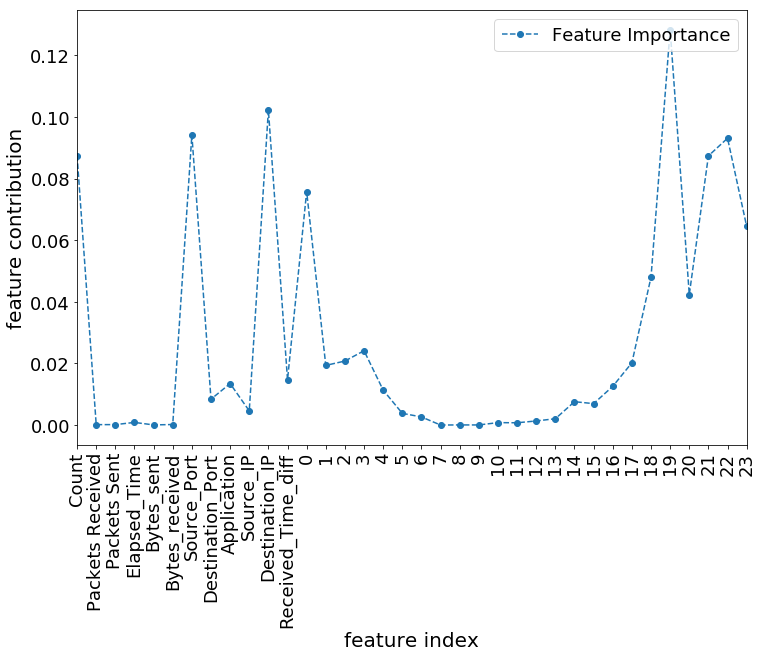

In [238]:
fig = plt.figure(figsize=(12, 8))
plt.plot(rf.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### AdaBoost Classifier

In [239]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.763426688633

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1895  232     2127
1           329  579      908
__all__    2224  811     3035

Accuracy of the  AdaBoostClassifier  model for test data is: 0.763833992095

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          597  108      705
1          131  176      307
__all__    728  284     1012

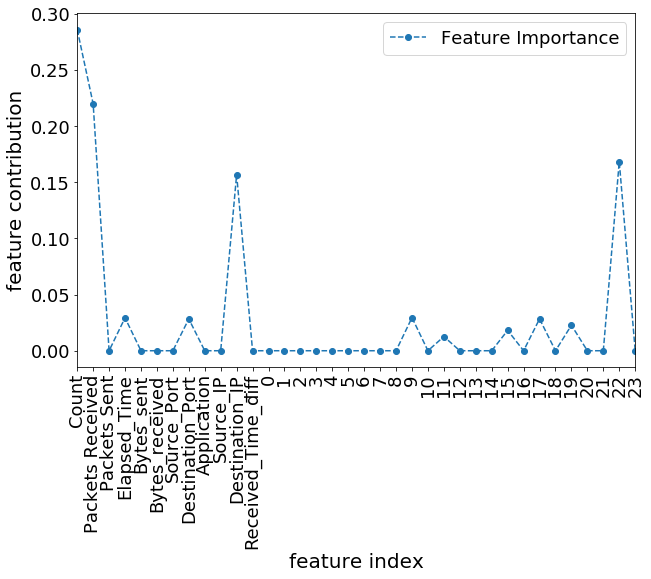

In [240]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(10, 6.5))
plt.plot(ada.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Gradient Boosting Classifier

In [241]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                   0.08           150             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.768698517298

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1878  249     2127
1           323  585      908
__all__    2201  834     3035

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.784584980237

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          606   99      705
1          119  188      307
__all__    725  287     1012

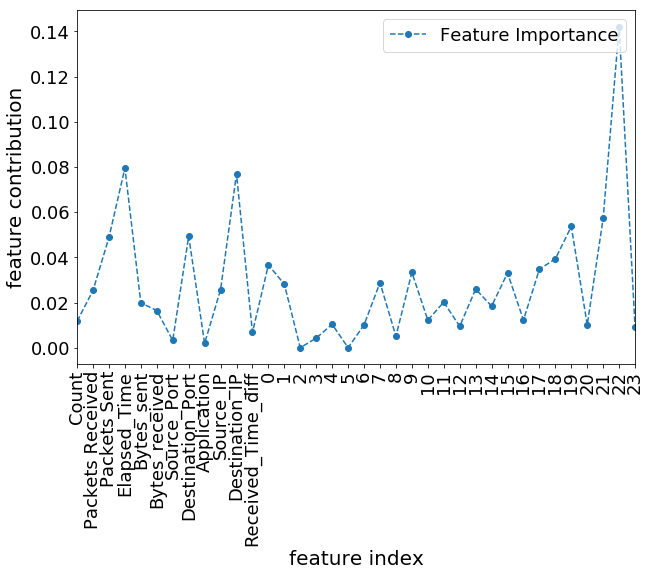

In [259]:
gbc=GradientBoostingClassifier(n_estimators=150,min_samples_leaf=10,min_samples_split=0.08,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

fig = plt.figure(figsize=(10, 6.5))
plt.plot(gbc.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Extra Tree Classifier

In [243]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Decision Tree  model for training data is: 0.756836902801

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1638   489     2127
1           252   656      908
__all__    1890  1145     3035

Accuracy of the  Decision Tree  model for test data is: 0.76185770751

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          549  156      705
1           85  222      307
__all__    634  378     1012

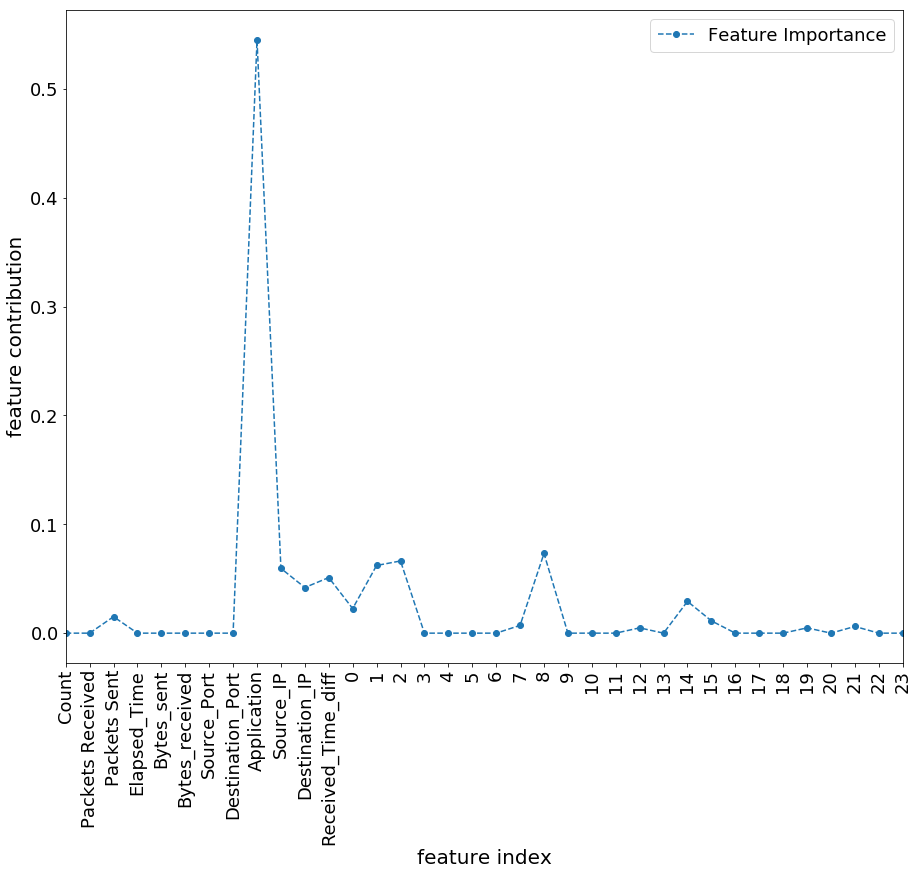

In [260]:
ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

fig = plt.figure(figsize=(15,12))
plt.plot(ext_tree.feature_importances_, '--o', label = 'Feature Importance')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),z.iloc[:,z.columns!='Target'].columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Bagging Classifier

In [245]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.771334431631

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2116   11     2127
1           115  793      908
__all__    2231  804     3035

Accuracy of the  Bagging  model for test data is: 0.801383399209

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          614   91      705
1          110  197      307
__all__    724  288     1012

### Neural Network

In [246]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [247]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [248]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.958154860163


In [249]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.752964426877


In [250]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [251]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [252]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [253]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [254]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2bec44c2e8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [255]:
grid_search.score(X_train,Y_train)

0.79604612850082368

In [256]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [257]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          572  133      705
1           98  209      307
__all__    670  342     1012

In [258]:
(572+209)/1012

0.7717391304347826

### Voting

In [261]:
from sklearn.ensemble import VotingClassifier

In [262]:

knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='chebyshev',algorithm='ball_tree')


logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.001)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=150,random_state=0)


gbc=GradientBoostingClassifier(n_estimators=150,min_samples_leaf=10,min_samples_split=0.08,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)

ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='random')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.6,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)

In [263]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [264]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.840197693575


Predicted     0    1  __all__
Actual                       
0          1917  210     2127
1           275  633      908
__all__    2192  843     3035

The test accuracy is: 0.790513833992


Predicted    0    1  __all__
Actual                      
0          613   92      705
1          120  187      307
__all__    733  279     1012

### Sklearn MLPClassifier

In [265]:
from sklearn.neural_network import MLPClassifier

In [266]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          30             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.746952224053

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2054   73     2127
1           215  693      908
__all__    2269  766     3035

Accuracy of the  MLPClassifier  model for test data is: 0.762845849802

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          602  103      705
1          137  170      307
__all__    739  273     1012

In [267]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(100,12),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='2.B.B' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [268]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [269]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [270]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [271]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [272]:
table_80.set_index(['index'],drop=True,inplace=True)

In [273]:
table_80

accuracy     TP      TN     FP     FN       FPR  \
index                                                                      
KNN_Train                1.000000  908.0  2127.0    0.0    0.0  0.000000   
KNN_Test                 0.776680  163.0   623.0   82.0  144.0  0.469055   
Logistic_Train           0.759143  428.0  1876.0  251.0  480.0  0.528634   
Logistic_Test            0.768775  160.0   618.0   87.0  147.0  0.478827   
Random_Forest_Train      0.764745  497.0  1824.0  303.0  411.0  0.452643   
Random_Forest_Test       0.789526  184.0   615.0   90.0  123.0  0.400651   
Aadaboost_Train          0.815157  579.0  1895.0  232.0  329.0  0.362335   
Adaboost_Test            0.763834  176.0   597.0  108.0  131.0  0.426710   
Gradient_Boosting Train  0.811532  585.0  1878.0  249.0  323.0  0.355727   
Gradient_Boosting Test   0.784585  188.0   606.0   99.0  119.0  0.387622   
Extra Tree Train         0.755848  656.0  1638.0  489.0  252.0  0.277533   
Extra Tree Test          0.761858  222.0   549.0  156.0   85.0  0.276873   
Bagging Train            0.958484  793.0  2116.0   11.0  115.0  0.126652   
Bagging Test             0.801383  197.0   614.0   91.0  110.0  0.358306   
Deep_Learning_Train      0.958155  811.0  2097.0   30.0   97.0  0.106828   
Deep_Learning_Test       0.752964  166.0   596.0  109.0  141.0  0.459283   
MLP_Train                0.953213  793.0  2100.0   27.0  115.0  0.126652   
MLP_Test                 0.774704  186.0   598.0  107.0  121.0  0.394137   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.116312  
Logistic_Train           0.118007  
Logistic_Test            0.123404  
Random_Forest_Train      0.142454  
Random_Forest_Test       0.127660  
Aadaboost_Train          0.109074  
Adaboost_Test            0.153191  
Gradient_Boosting Train  0.117066  
Gradient_Boosting Test   0.140426  
Extra Tree Train         0.229901  
Extra Tree Test          0.221277  
Bagging Train            0.005172  
Bagging Test             0.129078  
Deep_Learning_Train      0.014104  
Deep_Learning_Test       0.154610  
MLP_Train                0.012694  
MLP_Test                 0.151773

<a id='2.C' style="text-decoration : none; color : #000000;"><h3> 80:20 Train/Test Split with PCA </h3></a>

In [279]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_12=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 15 components is: 0.932721090161


In [280]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_12,Y,random_state=0,test_size=0.2)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [281]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [282]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.752239728143

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2263    0     2263
1             0  974      974
__all__    2263  974     3237

Accuracy of the  KNN  model for test data is: 0.755555555556

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          527   42      569
1          156   85      241
__all__    683  127      810

### Logistic

In [283]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.7       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.75656472042

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2003  260     2263
1           529  445      974
__all__    2532  705     3237

Accuracy of the  Logistic  model for test data is: 0.783950617284

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          509   60      569
1          115  126      241
__all__    624  186      810

### Gaussain NB

In [284]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.739882607352


Predicted     0    1  __all__
Actual                       
0          2040  223     2263
1           619  355      974
__all__    2659  578     3237

             precision    recall  f1-score   support

          0       0.77      0.90      0.83      2263
          1       0.61      0.36      0.46       974

avg / total       0.72      0.74      0.72      3237

Accuracy o f Gaussian NB on test data is: 0.753086419753


Predicted    0    1  __all__
Actual                      
0          510   59      569
1          141  100      241
__all__    651  159      810

### Random Forsest

In [285]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [286]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.713314797652


Predicted     0    1  __all__
Actual                       
0          2233   30     2263
1           898   76      974
__all__    3131  106     3237

Accuracy of Random Forest Model on test data is: 0.733333333333


Predicted    0   1  __all__
Actual                     
0          565   4      569
1          212  29      241
__all__    777  33      810

### AdaBoost Classifier

In [287]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.763361136855

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2006  257     2263
1           392  582      974
__all__    2398  839     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.79012345679

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   73      569
1           97  144      241
__all__    593  217      810

### Gradient Boosting Classifier

In [288]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                   0.08           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.764905776954

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2005  258     2263
1           416  558      974
__all__    2421  816     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.788888888889

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   73      569
1           98  143      241
__all__    594  216      810

### Extra Tree Classifier

In [289]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[5,10,20],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best


Accuracy of the  Decision Tree  model for training data is: 0.746987951807

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1796   467     2263
1           253   721      974
__all__    2049  1188     3237

Accuracy of the  Decision Tree  model for test data is: 0.774074074074

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          449  120      569
1           63  178      241
__all__    512  298      810

### Bagging Classifier

In [290]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.764905776954

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2248   15     2263
1           189  785      974
__all__    2437  800     3237

Accuracy of the  Bagging  model for test data is: 0.781481481481

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          510   59      569
1          118  123      241
__all__    628  182      810

### Neural Network

In [291]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [292]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [293]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.892184121118


In [294]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.755555555556


In [295]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [296]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [297]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [298]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [299]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2be094bb38>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [300]:
grid_search.score(X_train,Y_train)

0.79456286685202349

In [301]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [302]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          488   81      569
1           84  157      241
__all__    572  238      810

In [305]:
(488+157)/810

0.7962962962962963

### Voting

In [306]:
from sklearn.ensemble import VotingClassifier

In [307]:

knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='euclidean',algorithm='auto')


logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=1e-1)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)

ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=100,random_state=0)


gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.08,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)

ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=5,random_state=0,splitter='best')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)

In [308]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [309]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.843682421996


Predicted     0    1  __all__
Actual                       
0          2108  155     2263
1           351  623      974
__all__    2459  778     3237

The test accuracy is: 0.78024691358


Predicted    0    1  __all__
Actual                      
0          502   67      569
1          111  130      241
__all__    613  197      810

### Sklearn MLPClassifier

In [310]:
from sklearn.neural_network import MLPClassifier

In [311]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            tanh  0.001          30             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.746987951807

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2096  167     2263
1           313  661      974
__all__    2409  828     3237

Accuracy of the  MLPClassifier  model for test data is: 0.743209876543

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          482   87      569
1          121  120      241
__all__    603  207      810

In [312]:
mlp=MLPClassifier(activation='tanh',alpha=0.001,batch_size=30,hidden_layer_sizes=(100,12),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='2.C.C' style="text-decoration : none; color : #000000;"><h3> Comparision Table </h3></a>

In [313]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [314]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [315]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [316]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [317]:
table_80.set_index(['index'],drop=True,inplace=True)

In [318]:
table_80

accuracy     TP      TN     FP     FN       FPR  \
index                                                                      
KNN_Train                1.000000  974.0  2263.0    0.0    0.0  0.000000   
KNN_Test                 0.755556   85.0   527.0   42.0  156.0  0.647303   
Logistic_Train           0.755638  443.0  2003.0  260.0  531.0  0.545175   
Logistic_Test            0.782716  126.0   508.0   61.0  115.0  0.477178   
Random_Forest_Train      0.713315   76.0  2233.0   30.0  898.0  0.921971   
Random_Forest_Test       0.733333   29.0   565.0    4.0  212.0  0.879668   
Aadaboost_Train          0.799506  582.0  2006.0  257.0  392.0  0.402464   
Adaboost_Test            0.790123  144.0   496.0   73.0   97.0  0.402490   
Gradient_Boosting Train  0.790238  556.0  2002.0  261.0  418.0  0.429158   
Gradient_Boosting Test   0.783951  143.0   492.0   77.0   98.0  0.406639   
Extra Tree Train         0.777572  721.0  1796.0  467.0  253.0  0.259754   
Extra Tree Test          0.774074  178.0   449.0  120.0   63.0  0.261411   
Bagging Train            0.936979  785.0  2248.0   15.0  189.0  0.194045   
Bagging Test             0.781481  123.0   510.0   59.0  118.0  0.489627   
Deep_Learning_Train      0.892184  727.0  2161.0  102.0  247.0  0.253593   
Deep_Learning_Test       0.755556  124.0   488.0   81.0  117.0  0.485477   
MLP_Train                0.918443  773.0  2200.0   63.0  201.0  0.206366   
MLP_Test                 0.740741  120.0   480.0   89.0  121.0  0.502075   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.073814  
Logistic_Train           0.114892  
Logistic_Test            0.107206  
Random_Forest_Train      0.013257  
Random_Forest_Test       0.007030  
Aadaboost_Train          0.113566  
Adaboost_Test            0.128295  
Gradient_Boosting Train  0.115334  
Gradient_Boosting Test   0.135325  
Extra Tree Train         0.206363  
Extra Tree Test          0.210896  
Bagging Train            0.006628  
Bagging Test             0.103691  
Deep_Learning_Train      0.045073  
Deep_Learning_Test       0.142355  
MLP_Train                0.027839  
MLP_Test                 0.156415

<a id='2.D' style="text-decoration : none; color : #000000;"><h3> 75:25 Train Test Split </h3></a>

In [319]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_12=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 15 components is: 0.932721090161


In [320]:
print("The train/test split ratio is 75:25")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_12,Y,random_state=0,test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 75:25


In [321]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
    
    
    
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

### KNN

In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev','minkowski'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.748270181219

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2127    0     2127
1             0  908      908
__all__    2127  908     3035

Accuracy of the  KNN  model for test data is: 0.75395256917

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          650   55      705
1          194  113      307
__all__    844  168     1012

### Logistic

In [323]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  liblinear  1e-05


Accuracy of the  Logistic  model for training data is: 0.755189456343

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1871  256     2127
1           480  428      908
__all__    2351  684     3035

Accuracy of the  Logistic  model for test data is: 0.774703557312

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          620   85      705
1          143  164      307
__all__    763  249     1012

### Gaussain NB

In [324]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
print("Accuracy of Gaussian NB on training data is:",mnb.score(X_train,Y_train))
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
print("Accuracy o f Gaussian NB on test data is:",accuracy_score(Y_test,mnb.predict(X_test)))
get_cm(mnb,X_test,Y_test)

Accuracy of Gaussian NB on training data is: 0.737726523888


Predicted     0    1  __all__
Actual                       
0          1932  195     2127
1           601  307      908
__all__    2533  502     3035

             precision    recall  f1-score   support

          0       0.76      0.91      0.83      2127
          1       0.61      0.34      0.44       908

avg / total       0.72      0.74      0.71      3035

Accuracy o f Gaussian NB on test data is: 0.75


Predicted    0    1  __all__
Actual                      
0          640   65      705
1          188  119      307
__all__    828  184     1012

### Random Forsest

In [325]:
# rfc=RandomForestClassifier()
# parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
#                   max_features=['auto','sqrt'],min_samples_split=[0.1,0.2],
#                  min_samples_leaf=[0.1,0.2],max_leaf_nodes=[10,15],min_impurity_decrease=[1e-7,1e-5],max_depth=[10,20],oob_score=[True],
#                  random_state=[0],n_jobs=[-1])
# rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

In [326]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.710708401977


Predicted     0   1  __all__
Actual                      
0          2108  19     2127
1           859  49      908
__all__    2967  68     3035

Accuracy of Random Forest Model on test data is: 0.715415019763


Predicted    0   1  __all__
Actual                     
0          701   4      705
1          284  23      307
__all__    985  27     1012

### AdaBoost Classifier

In [327]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.762438220758

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1838  289     2127
1           411  497      908
__all__    2249  786     3035

Accuracy of the  AdaBoostClassifier  model for test data is: 0.784584980237

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          615   90      705
1          128  179      307
__all__    743  269     1012

### Gradient Boosting Classifier

In [328]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05],
                n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.08],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

# print("The accuracy of Gradient Boosting Trees on training data is:",gbc.score(X_train,Y_train))
# print("The accuracy of Gradient Boosting Trees on test data is:",accuracy_score(Y_test,gbc.predict(X_test)))

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.771663920923

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1875  252     2127
1           398  510      908
__all__    2273  762     3035

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.775691699605

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          616   89      705
1          138  169      307
__all__    754  258     1012

### Extra Tree Classifier

In [329]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[5,10,20],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                 20             0      best


Accuracy of the  Decision Tree  model for training data is: 0.750247116969

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1907  220     2127
1           429  479      908
__all__    2336  699     3035

Accuracy of the  Decision Tree  model for test data is: 0.737154150198

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          620   85      705
1          181  126      307
__all__    801  211     1012

### Bagging Classifier

In [330]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.763426688633

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2109   18     2127
1           176  732      908
__all__    2285  750     3035

Accuracy of the  Bagging  model for test data is: 0.778656126482

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          623   82      705
1          142  165      307
__all__    765  247     1012

### Neural Network

In [331]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [332]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

In [333]:
print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])

The accuracy of the model on training data is: 0.910049423649


In [334]:
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))

The accuracy of the model on test data is: 0.755928853755


In [335]:
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])

### Grid search with Keras

In [336]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [337]:
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)

In [338]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [339]:
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2bd587fb38>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [20], 'nb_epoch': [120], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [340]:
grid_search.score(X_train,Y_train)

0.79077429983525538

In [341]:
pred=grid_search.predict(X_test)
pred=pred.reshape(1,len(pred))
pred=pred[0]

In [342]:
ConfusionMatrix(Y_test,pred)

Predicted    0    1  __all__
Actual                      
0          604  101      705
1          132  175      307
__all__    736  276     1012

In [344]:
(604+175)/1012

0.7697628458498024

### Voting

In [156]:
from sklearn.ensemble import VotingClassifier

In [345]:

knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='euclidean',algorithm='auto')


logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='liblinear',tol=1e-3)

rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)


ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=100,random_state=0)

gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.05)


ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=20,random_state=0,splitter='best')


bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.6,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)

In [346]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

In [347]:
eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.840527182867


Predicted     0    1  __all__
Actual                       
0          2023  104     2127
1           380  528      908
__all__    2403  632     3035

The test accuracy is: 0.78162055336


Predicted    0    1  __all__
Actual                      
0          632   73      705
1          148  159      307
__all__    780  232     1012

### Sklearn MLPClassifier

In [348]:
from sklearn.neural_network import MLPClassifier

In [349]:
mlp=MLPClassifier()

parameters=dict(hidden_layer_sizes=[(50,8),(100,12)],activation=['tanh','relu'],
               solver=['adam'],alpha=[1e-3],batch_size=[20,30],learning_rate=['adaptive'],
              power_t=[1e-3],max_iter=[200],random_state=[0],tol=[1e-7],
               validation_fraction=[0.2])

mlp_model=grid(mlp,parameters,X_train,Y_train,X_test,Y_test,"MLPClassifier")

Best Parameters are :


0      1           2                   3              4   \
index  activation  alpha  batch_size  hidden_layer_sizes  learning_rate   
0            relu  0.001          30             (50, 8)       adaptive   

             5        6             7       8      9                    10  
index  max_iter  power_t  random_state  solver    tol  validation_fraction  
0           200    0.001             0    adam  1e-07                  0.2


Accuracy of the  MLPClassifier  model for training data is: 0.753212520593

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1987  140     2127
1           312  596      908
__all__    2299  736     3035

Accuracy of the  MLPClassifier  model for test data is: 0.756916996047

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          603  102      705
1          144  163      307
__all__    747  265     1012

In [350]:
mlp=MLPClassifier(activation='relu',alpha=0.001,batch_size=30,hidden_layer_sizes=(50,8),learning_rate='adaptive',
                 max_iter=200,power_t=0.001,random_state=0,solver='adam',tol=1e-7,validation_fraction=0.2)
mlp.fit(X_train,Y_train)
cm_mlp_train=ConfusionMatrix(Y_train,mlp.predict(X_train))
cm_mlp_test=ConfusionMatrix(Y_test,mlp.predict(X_test))

<a id='2.D.D' style="text-decoration : none; color : #000000;"><h3> Comparison Table </h3></a>

In [351]:
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

logistic.fit(X_train,Y_train)
cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

rf.fit(X_train,Y_train)
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

ada.fit(X_train,Y_train)
cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

gbc.fit(X_train,Y_train)
cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

ext_tree.fit(X_train,Y_train)
cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

bagging.fit(X_train,Y_train)
cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [352]:
table_80=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

In [353]:
### KNN
table_80.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,cm_knn_train.FP,cm_knn_train.FN,
                cm_knn_train.FNR,cm_knn_train.FPR])
table_80.loc[1]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,cm_knn_test.FP,cm_knn_test.FN,
                cm_knn_test.FNR,cm_knn_test.FPR])
### Logistic
table_80.loc[2]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,cm_logistic_train.FP,cm_logistic_train.FN,
                cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80.loc[3]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,cm_logistic_test.FP,cm_logistic_test.FN,
                cm_logistic_test.FNR,cm_logistic_test.FPR])


### RF
table_80.loc[4]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80.loc[5]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

### ADA
table_80.loc[6]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,
                cm_ada_train.FNR,cm_ada_train.FPR])
table_80.loc[7]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,
                cm_ada_test.FNR,cm_ada_test.FPR])

### GBC
table_80.loc[8]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,cm_gbc_train.FP,cm_gbc_train.FN,
                cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80.loc[9]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,cm_gbc_test.FP,cm_gbc_test.FN,
                cm_gbc_test.FNR,cm_gbc_test.FPR])

### Extra_Tree
table_80.loc[10]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,cm_ext_tree_train.FP,cm_ext_tree_train.FN,
                cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80.loc[11]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,cm_ext_tree_test.FP,cm_ext_tree_test.FN,
                cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


### Bagging

table_80.loc[12]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80.loc[13]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

### Deep Learning
table_80.loc[14]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80.loc[15]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

###MLP
table_80.loc[16]=([accuracy_score(Y_train,mlp.predict(X_train)),cm_mlp_train.TP,cm_mlp_train.TN,cm_mlp_train.FP,cm_mlp_train.FN,
                cm_mlp_train.FNR,cm_mlp_train.FPR])
table_80.loc[17]=([accuracy_score(Y_test,mlp.predict(X_test)),cm_mlp_test.TP,cm_mlp_test.TN,cm_mlp_test.FP,cm_mlp_test.FN,
                cm_mlp_test.FNR,cm_mlp_test.FPR])

In [354]:
table_80['index']=['KNN_Train','KNN_Test','Logistic_Train','Logistic_Test','Random_Forest_Train','Random_Forest_Test',
                   'Aadaboost_Train','Adaboost_Test','Gradient_Boosting Train','Gradient_Boosting Test',
                   'Extra Tree Train','Extra Tree Test','Bagging Train','Bagging Test','Deep_Learning_Train','Deep_Learning_Test',
                  'MLP_Train','MLP_Test']

In [355]:
table_80.set_index(['index'],drop=True,inplace=True)

In [356]:
table_80

accuracy     TP      TN     FP     FN       FPR  \
index                                                                      
KNN_Train                1.000000  908.0  2127.0    0.0    0.0  0.000000   
KNN_Test                 0.753953  113.0   650.0   55.0  194.0  0.631922   
Logistic_Train           0.757496  428.0  1871.0  256.0  480.0  0.528634   
Logistic_Test            0.774704  164.0   620.0   85.0  143.0  0.465798   
Random_Forest_Train      0.710708   49.0  2108.0   19.0  859.0  0.946035   
Random_Forest_Test       0.715415   23.0   701.0    4.0  284.0  0.925081   
Aadaboost_Train          0.769357  497.0  1838.0  289.0  411.0  0.452643   
Adaboost_Test            0.784585  179.0   615.0   90.0  128.0  0.416938   
Gradient_Boosting Train  0.785832  510.0  1875.0  252.0  398.0  0.438326   
Gradient_Boosting Test   0.775692  169.0   616.0   89.0  138.0  0.449511   
Extra Tree Train         0.786161  479.0  1907.0  220.0  429.0  0.472467   
Extra Tree Test          0.737154  126.0   620.0   85.0  181.0  0.589577   
Bagging Train            0.936079  732.0  2109.0   18.0  176.0  0.193833   
Bagging Test             0.778656  165.0   623.0   82.0  142.0  0.462541   
Deep_Learning_Train      0.910049  701.0  2061.0   66.0  207.0  0.227974   
Deep_Learning_Test       0.755929  163.0   602.0  103.0  144.0  0.469055   
MLP_Train                0.851071  596.0  1987.0  140.0  312.0  0.343612   
MLP_Test                 0.756917  163.0   603.0  102.0  144.0  0.469055   

                              FNR  
index                              
KNN_Train                0.000000  
KNN_Test                 0.078014  
Logistic_Train           0.120357  
Logistic_Test            0.120567  
Random_Forest_Train      0.008933  
Random_Forest_Test       0.005674  
Aadaboost_Train          0.135872  
Adaboost_Test            0.127660  
Gradient_Boosting Train  0.118477  
Gradient_Boosting Test   0.126241  
Extra Tree Train         0.103432  
Extra Tree Test          0.120567  
Bagging Train            0.008463  
Bagging Test             0.116312  
Deep_Learning_Train      0.031030  
Deep_Learning_Test       0.146099  
MLP_Train                0.065820  
MLP_Test                 0.144681

In [359]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')